### Description
### Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

The company in the last campaign contacted the customers at random without looking at the available information. However, this time company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being, and wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

#### Objective

To predict which customer is more likely to purchase the newly introduced travel package.

#### Data Dictionary

##### Customer details:

- CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

##### Customer interaction data: 

* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer

#### Load requisite libraries

In [1]:
# install XGBoost
!pip install xgboost

In [3]:
# to tidy up coding structure
!pip install nb_black
%load_ext nb_black
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression


# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
from sklearn.model_selection import GridSearchCV

  Created wheel for nb-black: filename=nb_black-1.0.7-py3-none-any.whl size=5285 sha256=d1c9306c6bf8e34f70c4465fe9a004e59daa44972ab6844c4b209e591fc6a9f3
  Stored in directory: c:\users\muttm\appdata\local\pip\cache\wheels\a6\5e\1e\a15614d6ea220d070043db3b650d73a8b4938aefd520496c11
Successfully built nb-black


<IPython.core.display.Javascript object>

#### Load data

In [4]:
# load xlsx file
xls = pd.ExcelFile("Tourism.xlsx")

<IPython.core.display.Javascript object>

In [5]:
# extract tab specific to data
tourism = pd.read_excel(xls, "Tourism")

<IPython.core.display.Javascript object>

In [6]:
# copy data to another variable to ensure integrity of orignial data
tdata = tourism.copy()

<IPython.core.display.Javascript object>

In [7]:
# review first 5 rows of data
tdata.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


<IPython.core.display.Javascript object>

In [8]:
print(
    f"There are {tdata.shape[0]} rows and {tdata.shape[1]} columns in the tourism data."
)

There are 4888 rows and 20 columns in the tourism data.


<IPython.core.display.Javascript object>

In [9]:
# review information regarding data set
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

<IPython.core.display.Javascript object>

* There appears to be missing values in the data set
* Features with data type 'object' need to be converted to 'category' to conserve dataframe storage space

In [10]:
# change 'object' data type to 'category'
cols = tdata.select_dtypes(["object"])
for i in cols.columns:
    tdata[i] = tdata[i].astype("category")

<IPython.core.display.Javascript object>

In [11]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

<IPython.core.display.Javascript object>

CustomerID can be immediately dropped as that is unique to individual customers and not necessary for modeling. 

In [12]:
tdata.drop("CustomerID", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [13]:
# check for missing values
tdata.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

<IPython.core.display.Javascript object>

There are missing values in 'Age', 'TypeofContact', 'DurationofPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Numberof ChildrenVisiting', and 'MonthlyIncome'.  Before filling in missing data, it is advisable to perform some univariate analysis. 

Also, while XGBoosting automatically addresses missing values, the other modeling methods do not.  Therefore it is necessary to address these missing values.

First review statistical summary and quickly graph all features with numeric values for a visual overview.

In [14]:
# review statistical description of data
tdata.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0


<IPython.core.display.Javascript object>

There are outliers in the following features: DurationOfPitch, NumberOfTrips and MonthlyIncome

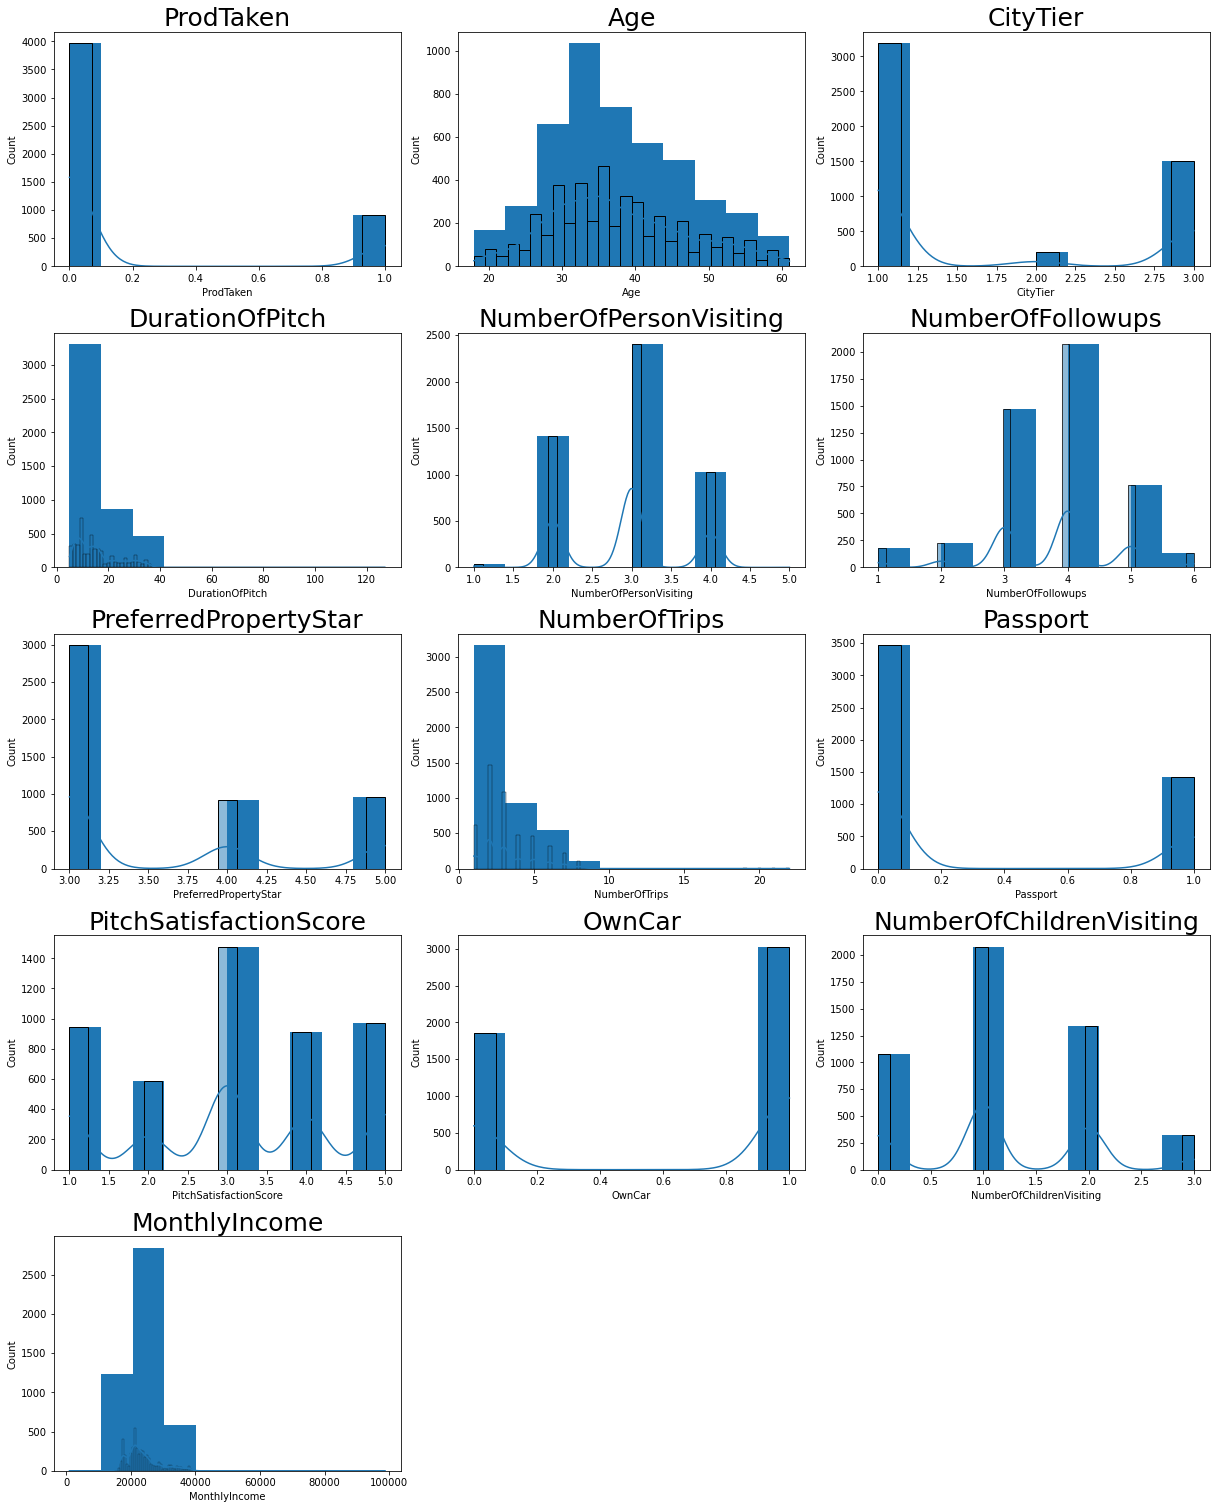

<IPython.core.display.Javascript object>

In [15]:
# histograms of all numeric columns in data set
all_col = tdata.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17, 75))

for i in range(len(all_col)):
    plt.subplot(18, 3, i + 1)
    plt.hist(tdata[all_col[i]])
    sns.histplot(tdata[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i], fontsize=25)

plt.show()

#### Summary Analysis and Strategy for Missing values
* 'Age'is fairly normally distributed therefore the mean will be used to replace all missing values.
* 'TypeofContract' is a categorical feature and therefore the mode will be used.
* 'DurationofPitch' is heavily right skewed with extreme outliers, therefore the median will be used. Outliers will be capped at 1.5 times the upper quartile figure.
* 'NumberOfFollowups' is a discrete number and therfore mode will be used.
* 'PreferredPropertyStar' is also a discrete number and will use mode to replace missing values.
* 'NumberOfTrips' is also discrete and will use mode for replacement.  This feature is heavily right skewed with outliers.
* 'NumberOfChildrenVisiting' is again, discrete and mode will be used for replacement.
* 'MonthlyIncome' is reasonably normally distributed but with outliers that do not appear to have much affect on the mean, therefore mean will be used.  This feature will be capped at 1.5 times the upper quartile figure.

In [16]:
# replace missing data
tdata["Age"].fillna(tdata["Age"].mean(), inplace=True)
tdata["TypeofContact"].fillna(tdata["TypeofContact"].mode()[0], inplace=True)
tdata["DurationOfPitch"].fillna(tdata["DurationOfPitch"].median(), inplace=True)
tdata["NumberOfFollowups"].fillna(tdata["NumberOfFollowups"].mode()[0], inplace=True)
tdata["PreferredPropertyStar"].fillna(
    tdata["PreferredPropertyStar"].mode()[0], inplace=True
)
tdata["NumberOfTrips"].fillna(tdata["NumberOfTrips"].mode()[0], inplace=True)
tdata["NumberOfChildrenVisiting"].fillna(
    tdata["NumberOfChildrenVisiting"].mode()[0], inplace=True
)
tdata["MonthlyIncome"].fillna(tdata["MonthlyIncome"].mean(), inplace=True)

<IPython.core.display.Javascript object>

In [17]:
# create floor and cap for 'DurationOfPitch' to eliminate extreme outlier
Q1 = tdata["DurationOfPitch"].quantile(0.25)  # 25th quantile
Q3 = tdata["DurationOfPitch"].quantile(0.75)  # 75th quantile
IQR = Q3 - Q1
Low_W = Q1 - 1.5 * IQR
Up_W = Q3 + 1.5 * IQR

# create new column to overwrite existing column that includes adjusted data.
tdata["DurationOfPitch"] = np.clip(tdata["DurationOfPitch"], Low_W, Up_W)

<IPython.core.display.Javascript object>

In [18]:
# create floor and cap for 'MonthlyIncome' to eliminate extreme outlier
Q1 = tdata["MonthlyIncome"].quantile(0.25)  # 25th quantile
Q3 = tdata["MonthlyIncome"].quantile(0.75)  # 75th quantile
IQR = Q3 - Q1
Low_W = Q1 - 1.5 * IQR
Up_W = Q3 + 1.5 * IQR

# create new column to overwrite existing column that includes adjusted data.
tdata["MonthlyIncome"] = np.clip(tdata["MonthlyIncome"], Low_W, Up_W)

<IPython.core.display.Javascript object>

In [19]:
# create floor and cap for 'NumberOfTrips' to eliminate extreme outlier
Q1 = tdata["NumberOfTrips"].quantile(0.25)  # 25th quantile
Q3 = tdata["NumberOfTrips"].quantile(0.75)  # 75th quantile
IQR = Q3 - Q1
Low_W = Q1 - 1.5 * IQR
Up_W = Q3 + 1.5 * IQR

# create new column to overwrite existing column that includes adjusted data.
tdata["NumberOfTrips"] = np.clip(tdata["NumberOfTrips"], Low_W, Up_W)

<IPython.core.display.Javascript object>

In [20]:
# verify no missing values
tdata.isna().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

<IPython.core.display.Javascript object>

In [21]:
# review statistical description to determine effect of outlier treatment
tdata.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.000,0.0,0.0,0.00,1.000
Age,4888.0,37.622265,9.098418,18.000,31.0,37.0,43.00,61.000
CityTier,4888.0,1.654255,0.916583,1.000,1.0,1.0,3.00,3.000
DurationOfPitch,4888.0,15.293576,7.938320,5.000,9.0,13.0,19.00,34.000
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.000,2.0,3.0,3.00,5.000
NumberOfFollowups,4888.0,3.711129,0.998271,1.000,3.0,4.0,4.00,6.000
PreferredPropertyStar,4888.0,3.577946,0.797005,3.000,3.0,3.0,4.00,5.000
NumberOfTrips,4888.0,3.168576,1.715676,1.000,2.0,3.0,4.00,7.000
Passport,4888.0,0.290917,0.454232,0.000,0.0,0.0,1.00,1.000
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.000,2.0,3.0,4.00,5.000


<IPython.core.display.Javascript object>

#### Next, review value counts for all categorical data

In [22]:
tdata.describe(include=("category")).T

,count,unique,top,freq
TypeofContact,4888,2,Self Enquiry,3469
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


<IPython.core.display.Javascript object>

In [23]:
# review unique characteristics in categorical columns
print("\n")
print("Type of Contact")
print(tdata["TypeofContact"].value_counts())
print("\n")
print("Occupation")
print(tdata["Occupation"].value_counts())
print("\n")
print("Gender")
print(tdata["Gender"].value_counts())
print("\n")
print("Product Pitched")
print(tdata["ProductPitched"].value_counts())
print("\n")
print("Marital Status")
print(tdata["MaritalStatus"].value_counts())
print("\n")
print("Designation")
print(tdata["Designation"].value_counts())
print("\n")
print("Passport")
print(tdata["Passport"].value_counts())



Type of Contact
Self Enquiry       3469
Company Invited    1419
Name: TypeofContact, dtype: int64


Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64


Gender
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64


Product Pitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64


Marital Status
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64


Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64


Passport
0    3466
1    1422
Name: Passport, dtype: int64


<IPython.core.display.Javascript object>

Under the 'Gender' feature there are 155 rows with the designation of 'Fe Male', assuming these customers are in fact females, these values need to be replaced.

In [24]:
tdata["Gender"] = tdata["Gender"].str.replace("Fe Male", "Female")

<IPython.core.display.Javascript object>

In [25]:
# verify corrected values for 'Gender'
tdata.Gender.value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

<IPython.core.display.Javascript object>

## Exploratory Data Analysis

### Univariate Analysis

In [26]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [27]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

#### Observations on Product Taken - target variable

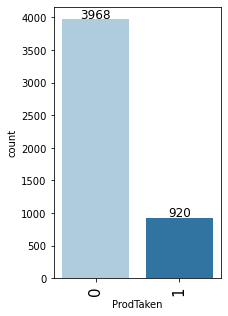

<IPython.core.display.Javascript object>

In [28]:
# begin with the target variable 'ProdTaken' - product taken,
# whether or not customer purchased travel package
labeled_barplot(tdata, "ProdTaken")

For the total data set with 4888 samples, only 920 customers accepted product, with 3698 not accepting.  This is not a very balanced data set. 

#### Observations on Type of Contact

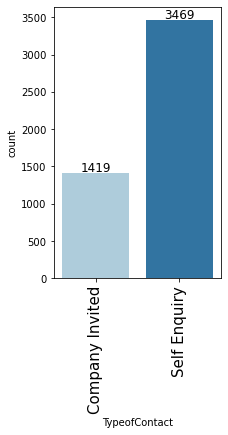

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(tdata, "TypeofContact")

Out of the entire data set, 3469 were potential customers contacting "Visit with us", whereas only 1419 were contacted by the company. It will be interesting to see which was more fruitful. 

#### Observations on Occupation

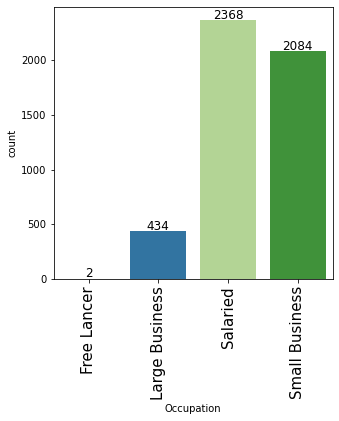

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(tdata, "Occupation")

The majority of customers in the data set are salaried individual, followed by small business owners or representatives.  

#### Observations on Gender

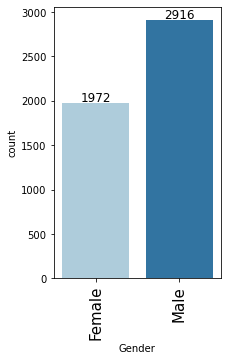

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(tdata, "Gender")

The allocation of male to female customers is somewhat skewed towards male customers.

#### Observations on Product Pitched

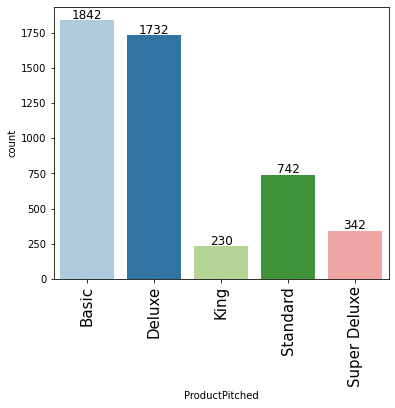

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(tdata, "ProductPitched")

The package that was pitched to customers most frequently was the Basic package, followed by the Deluxe package.

#### Observations on Marital Status

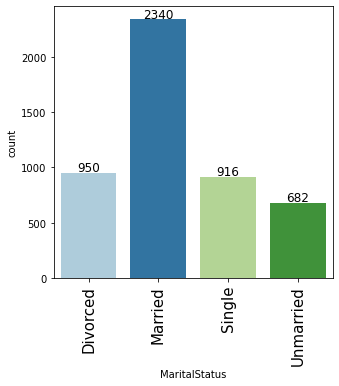

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(tdata, "MaritalStatus")

Clearly the majority of customers in the data set were married.

#### Observations on Designation

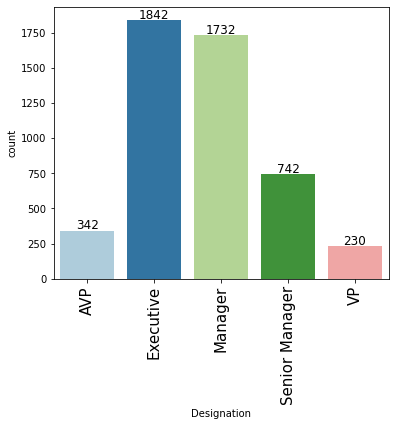

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(tdata, "Designation")

Customers' professional designation within their current organization was more often 'Executive', followe rather closely by 'Manager'.

#### Observations on all other numerical columns in data set

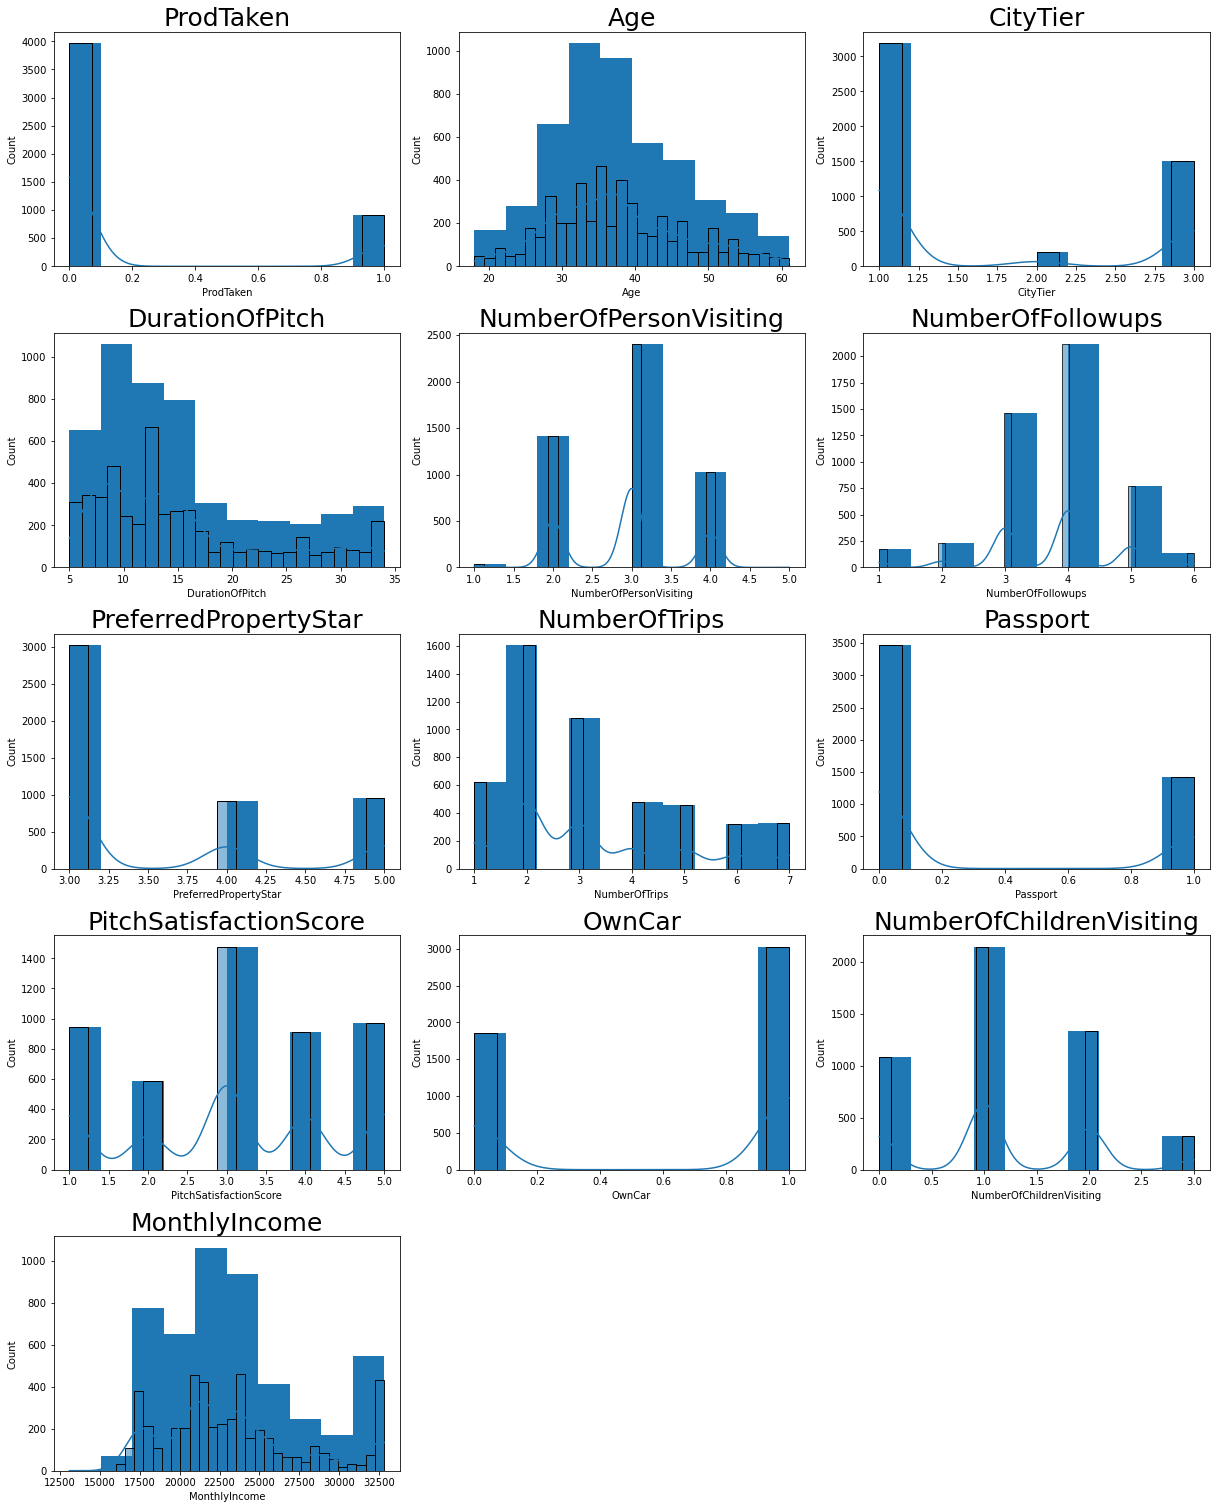

<IPython.core.display.Javascript object>

In [35]:
# Run the histograms of all numerical columns in the data set again,
# now that outliers have been capped
all_col = tdata.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17, 75))

for i in range(len(all_col)):
    plt.subplot(18, 3, i + 1)
    plt.hist(tdata[all_col[i]])
    sns.histplot(tdata[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i], fontsize=25)

plt.show()

* 'Age', 'DurationOfPitch' and 'MonthlyIncome' will be further analyzed because of continuous variables.  

The following are discrete:
* According to the 'CityTier' graph, the majority of customers live in the most developed and densely populated cities, followed by the least developed or populated cities.  Interestingly, the mid-tiered cities were the least represented.
* Most customers were searching for travel accommodations for groups of three, followed by two and then four.
* The most frequent number of follow-up contact by a sales person was four attempts, followed by three attempts.
* Most often, customers showed a preference for 3-star accommodations.  Four and 5-star accommodations preference were very similar.
* Number of trips taken had some extreme upper outliers, which were capped, but most often, customers took an average of 2 trips per year, followed by 3 trips and then 1 trip. 
* The majority of customers contacting the company had passports.
* When surveyed, customers stated an average of 3 for the pitch satisfaction, followed by similar results for both 1 and 5.  This is a possible area for improvement. 
* More customers own a car than do not.
* More customers were planning on traveling with only 1 child less than 5 years old, followed by 2 children, and then no children.

#### Observations on Age

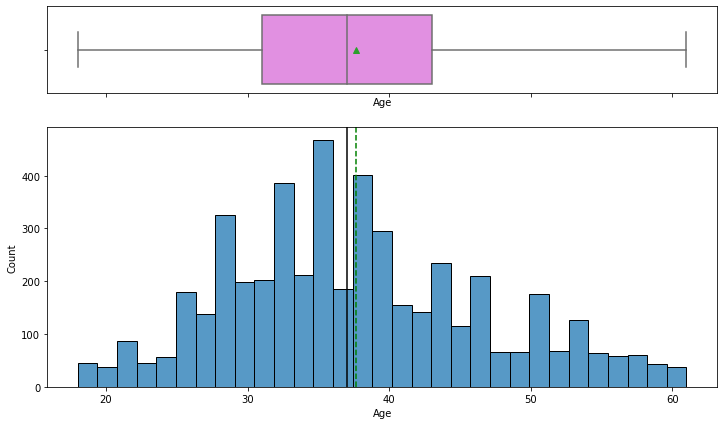

<IPython.core.display.Javascript object>

In [36]:
# review 'Age'
histogram_boxplot(tdata, "Age")

Age is fairly normally distributed with the mean and median around 37 years old.  The youngest customer was approximately 18 with the oldest being around 60.  The majority of customers range from mid to late 20's to mid to late 40's. 

#### Observations on Duration of Pitch

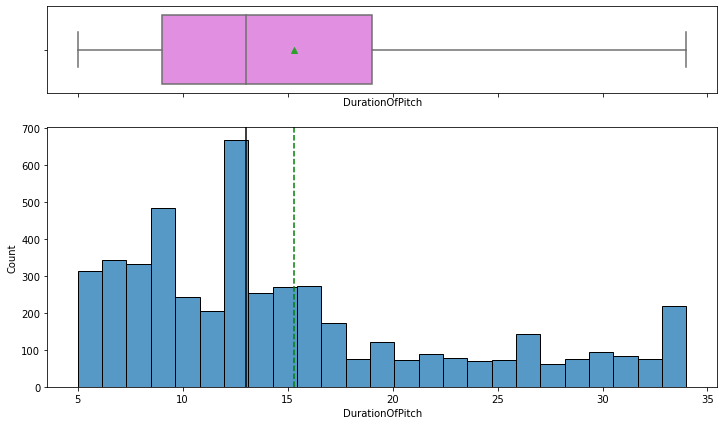

<IPython.core.display.Javascript object>

In [37]:
histogram_boxplot(tdata, "DurationOfPitch")

The duration of a sales pitch ranged from 5 minutes to 34 minutes. (Prior to capping outliers the maximum was 127 minutes).  It is slightly right skewed, with a median around 13 and a mean of approximately 15.

#### Observations on Monthly Income

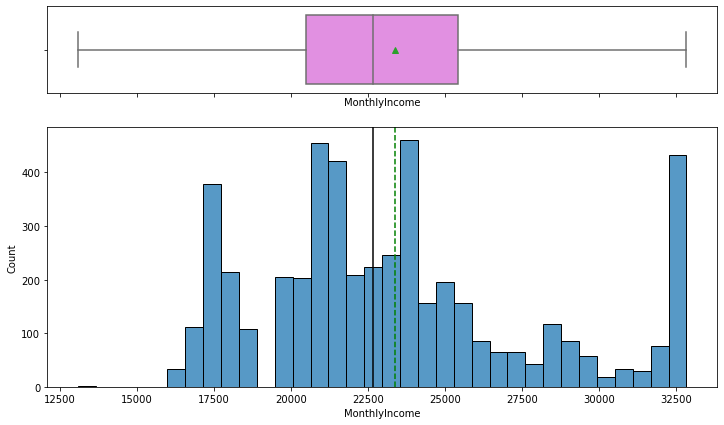

<IPython.core.display.Javascript object>

In [38]:
histogram_boxplot(tdata, "MonthlyIncome")

Monthly Income is somewhat normally distributed, with a mean of approximately 24k and a median of approximately 23k.  There does seem to be a spike in income around 32.5k, which is also approaching the maximum income after capping outliers.  Before capping outliers, the maximum monthly income was 99k. Minimum income is approximately 13k.


### Bivariate Analysis

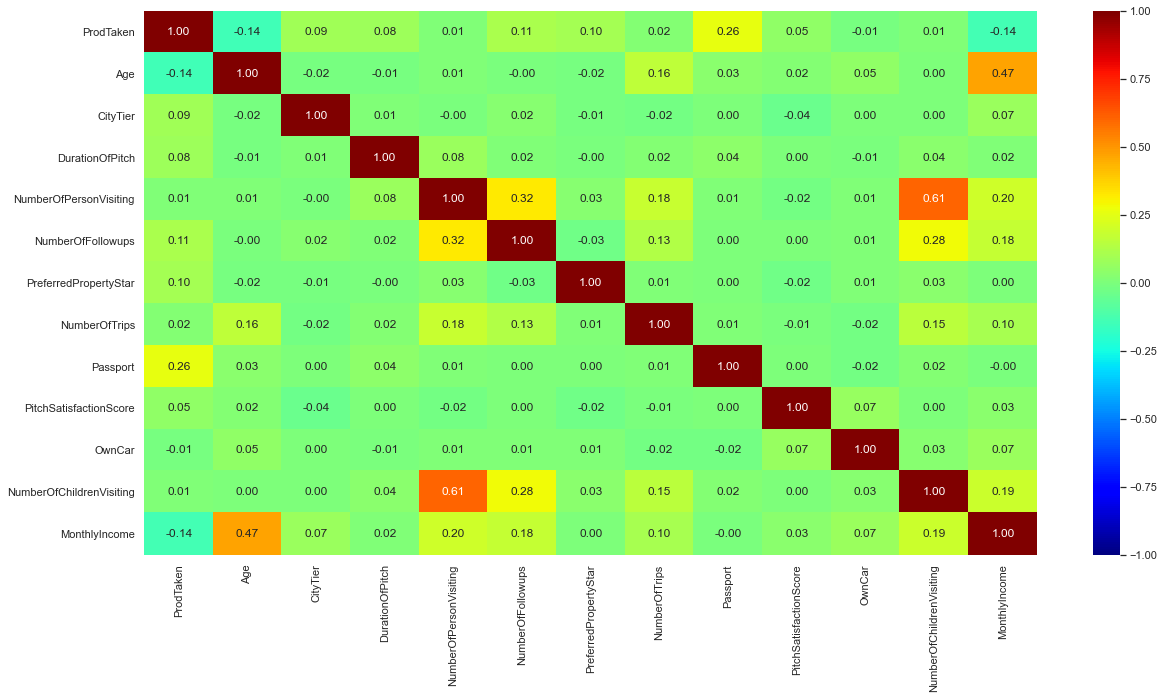

<IPython.core.display.Javascript object>

In [148]:
plt.figure(figsize=(20, 10))
sns.heatmap(tdata.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="jet")
plt.show()

* The highest correlated features with a correlation of 0.61 are 'Number of Children Visiting' and 'Number of Persons Visiting' which does make sense because children are more likely to be included with higher numbers of travel groups.  
* Age and Monthly income have a correlation of 0.47 which is also reasonable considering older individuals tend to have more work experience and thus higher incomes.
* Interestingly, there is a negative correlation of -0.14 between 'Monthly Income' and 'Product Taken' and also 'Age' and Product Taken'. These require further analysis.

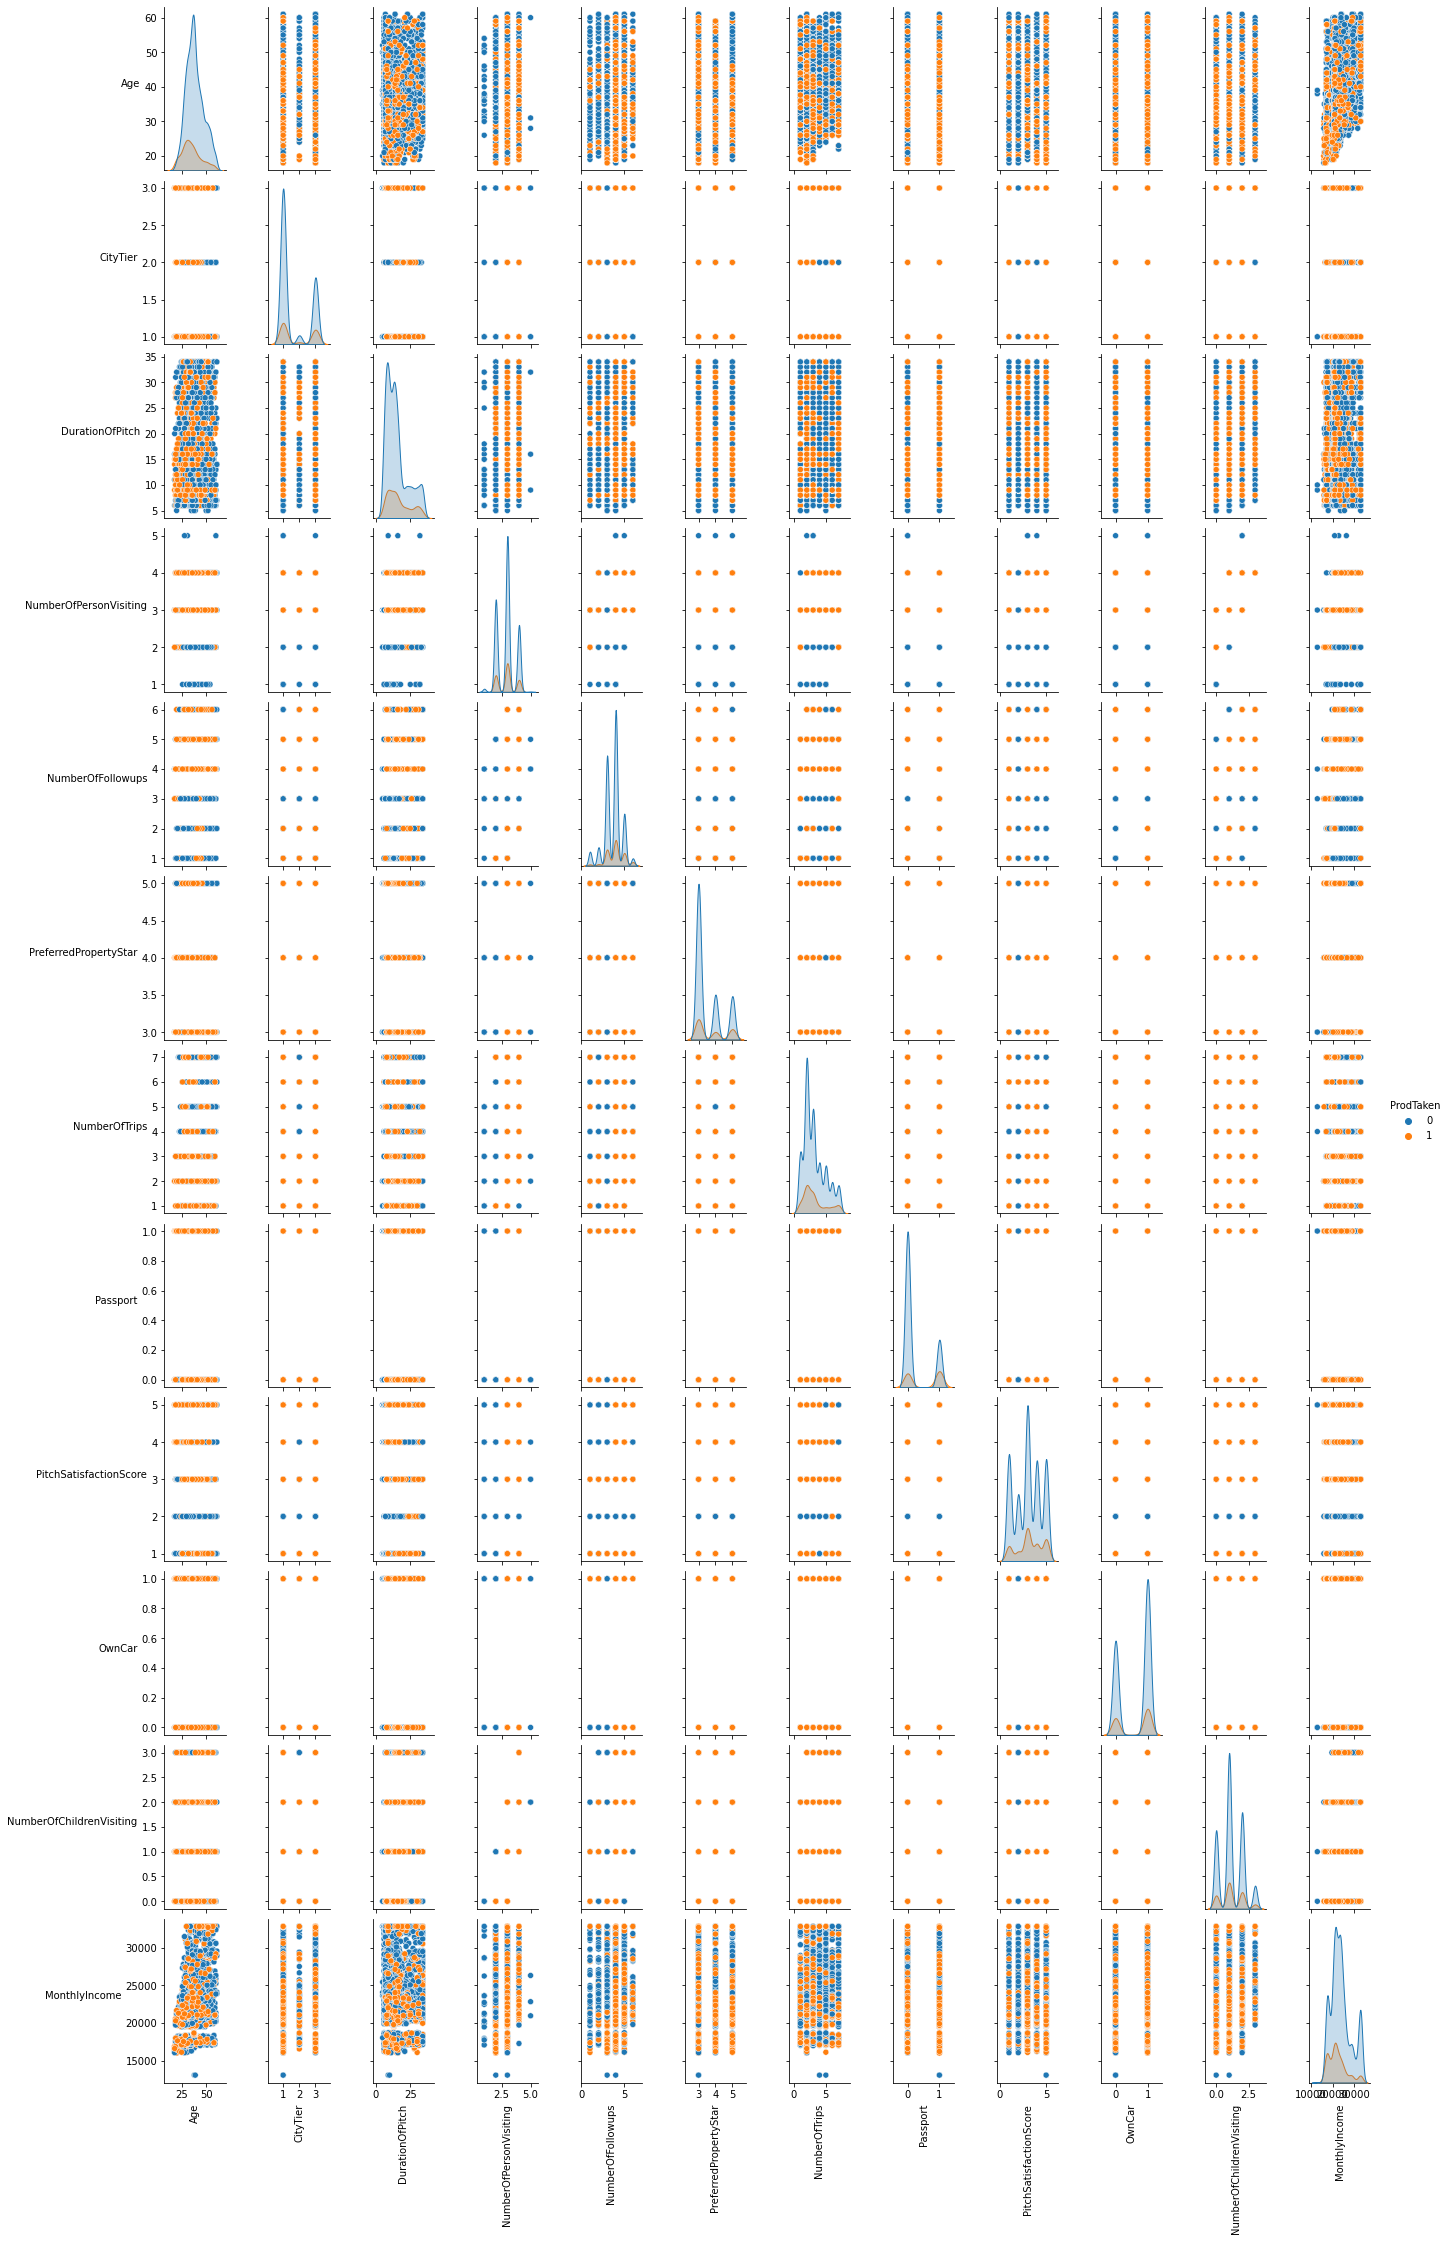

<IPython.core.display.Javascript object>

In [40]:
g = sns.pairplot(tdata, hue="ProdTaken", aspect=0.6)
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=90)
    ax.set_ylabel(ax.get_ylabel(), rotation=0)
    ax.yaxis.get_label().set_horizontalalignment("right")
plt.show()

There appears to be a variety ofdistributions between Product Taken and the other features.  Additional in depth exploration is necessary. 

In [41]:
!pip install termcolor

<IPython.core.display.Javascript object>

In [42]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    from termcolor import colored

    print(colored("Summary Counts", "blue", attrs=["bold"]))
    print(tab1)
    print("-" * 101)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()
    print("\n")
    print(colored("Percentage Allocation", "blue", attrs=["bold"]))
    print(tab)

<IPython.core.display.Javascript object>

#### Product Taken vs. Number of Persons Visiting and Number of Children Visiting

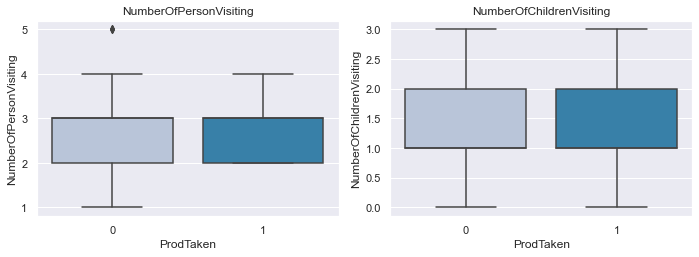

<IPython.core.display.Javascript object>

In [43]:
cols = tdata[["NumberOfPersonVisiting", "NumberOfChildrenVisiting"]].columns.tolist()
plt.figure(figsize=(10, 10))
sns.set(font_scale=1)
for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(tdata["ProdTaken"], tdata[variable], palette="PuBu")
    plt.tight_layout()
    plt.title(variable)
plt.show()

There appears to not be much difference between the number of persons visiting and number of children visiting with respect to whether or not the customer selected any packages.  It does appear the majority of customers accepting the offered product does tend toward groups of 2 or 3 individuals traveling together and 1 or 2 children under the age of 5 yrs old. 

#### Product Taken with respect to aspects of Sales Pitch

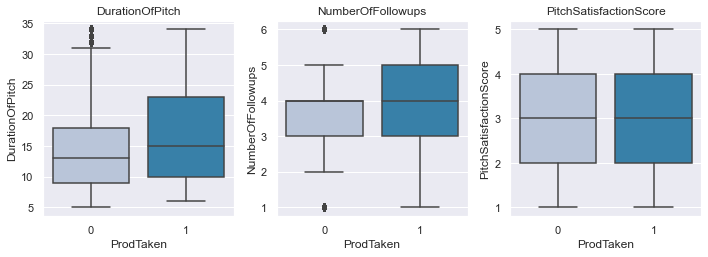

<IPython.core.display.Javascript object>

In [44]:
cols = tdata[
    ["DurationOfPitch", "NumberOfFollowups", "PitchSatisfactionScore"]
].columns.tolist()
plt.figure(figsize=(10, 10))
sns.set(font_scale=1)
for i, variable in enumerate(cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(tdata["ProdTaken"], tdata[variable], palette="PuBu")
    plt.tight_layout()
    plt.title(variable)
plt.show()

These graphs suggest the average acceptable length of initial sales pitch to secure sale is in the range of 10 to 23 minutes. Surprisingly, the longest sales pitch do not appear to result in a sale as frequently as the shorter time length.  The range of successful follow up calls to secure a sale are between 3 and five.  Again, more frequent calls does not appear to guarantee securing a sale.  Customers that were averagely satisfied with the sales pitch (in a range of 2 to 4 out of 5) tend to equally accept and not accept a product offered. 

#### Product Taken vs. Number of Trips and Preferred Property Star

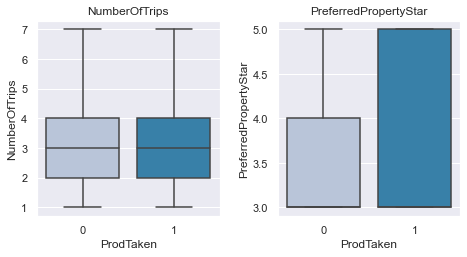

<IPython.core.display.Javascript object>

In [45]:
cols = tdata[["NumberOfTrips", "PreferredPropertyStar"]].columns.tolist()
plt.figure(figsize=(10, 10))
sns.set(font_scale=1)
for i, variable in enumerate(cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(tdata["ProdTaken"], tdata[variable], palette="PuBu")
    plt.tight_layout()
    plt.title(variable)
plt.show()

Customers who purchased travel packages perferred higher rated accommodations than those that did not. 

Summary Counts
ProdTaken         0    1   All
NumberOfTrips                 
All            3968  920  4888
2.0            1293  311  1604
3.0             862  217  1079
1.0             508  112   620
7.0             234   93   327
6.0             258   64   322
5.0             396   62   458
4.0             417   61   478
-----------------------------------------------------------------------------------------------------


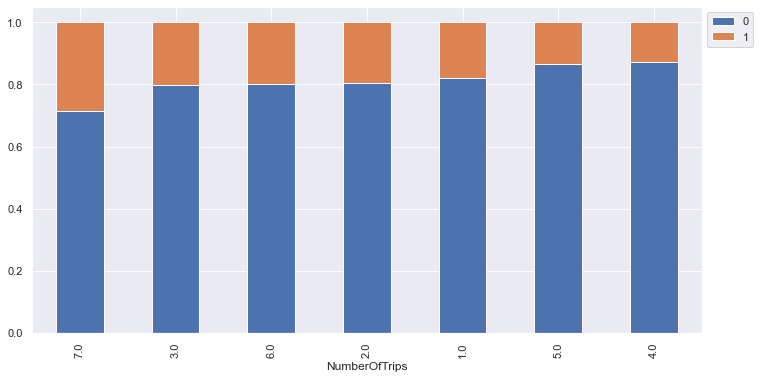



Percentage Allocation
ProdTaken             0         1
NumberOfTrips                    
7.0            0.715596  0.284404
3.0            0.798888  0.201112
6.0            0.801242  0.198758
2.0            0.806110  0.193890
1.0            0.819355  0.180645
5.0            0.864629  0.135371
4.0            0.872385  0.127615


<IPython.core.display.Javascript object>

In [150]:
stacked_barplot(tdata, "NumberOfTrips", "ProdTaken")

While the most frequent number of trips taken was 2 per year, then 3 per year, the most fequently purchased packages were made by customers who traveled 7 times per year, then 3 times per year.

Summary Counts
ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3968  920  4888
3.0                    2531  488  3019
5.0                     706  250   956
4.0                     731  182   913
-----------------------------------------------------------------------------------------------------


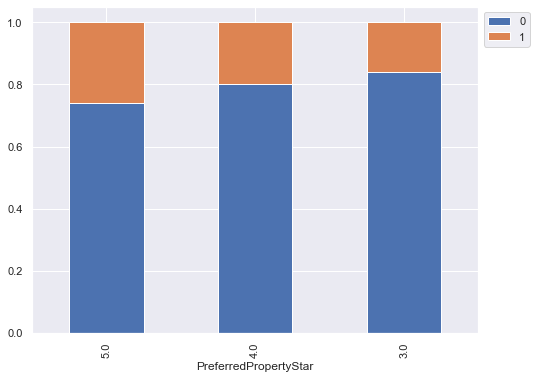



Percentage Allocation
ProdTaken                     0         1
PreferredPropertyStar                    
5.0                    0.738494  0.261506
4.0                    0.800657  0.199343
3.0                    0.838357  0.161643


<IPython.core.display.Javascript object>

In [46]:
stacked_barplot(tdata, "PreferredPropertyStar", "ProdTaken")

The most frequent number of trips taken by customers, regardless of whether or not the accepted a package is between 2 & 4.  The number of trips taken annually does not appear to have much impact on a customer choosing to accept an offer.  Customers that did not accept an offered package tend to prefer 3 to 4 star accommodations, whereas those that did accept an offer also preferred 5-star accommodations. Most frequently, 26.1 % of customers interested in 5-star accommodations accepted a package over 3 or 4, with 19.9% and 16.1% respectively. 

#### Product Taken Vs. Passport

Summary Counts
ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
-----------------------------------------------------------------------------------------------------


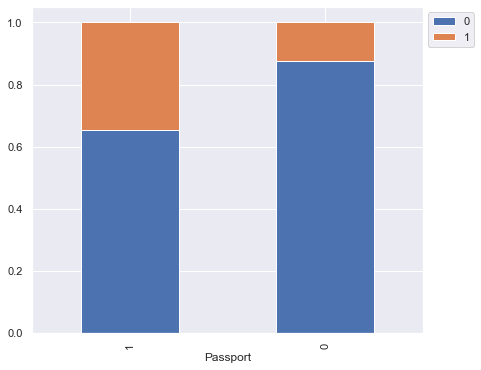



Percentage Allocation
ProdTaken         0         1
Passport                     
1          0.652602  0.347398
0          0.877092  0.122908


<IPython.core.display.Javascript object>

In [47]:
stacked_barplot(tdata, "Passport", "ProdTaken")

Customers with passports were more likely to accept an offered package than those without a passport.  Approximate 34% of customers with passports accepted offers whereas only about 12% of those without passports did.

#### Product Taken vs. Owning a Car

Summary Counts
ProdTaken     0    1   All
OwnCar                    
All        3968  920  4888
1          2472  560  3032
0          1496  360  1856
-----------------------------------------------------------------------------------------------------


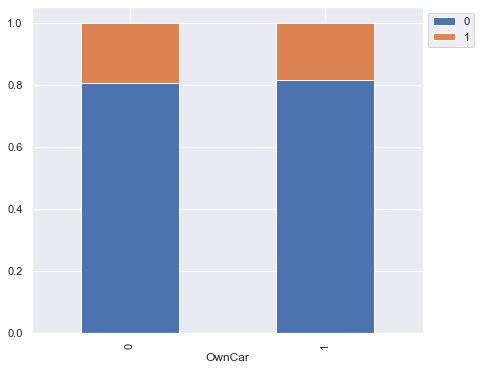



Percentage Allocation
ProdTaken         0         1
OwnCar                       
0          0.806034  0.193966
1          0.815303  0.184697


<IPython.core.display.Javascript object>

In [48]:
stacked_barplot(tdata, "OwnCar", "ProdTaken")

More customers own cars than do not. However, this feature does not appear to have much influence on selecting to purchase an package as percentage wise the acceptance rate is approximately 18% for those owning a car as and approximately 19% for those not.  This is a column that could feasibly be dropped. 



In [49]:
# delete OwnCar
tdata1 = tdata.drop("OwnCar", axis=1)

<IPython.core.display.Javascript object>

#### Product Taken vs. CityTier

Summary Counts
ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
-----------------------------------------------------------------------------------------------------


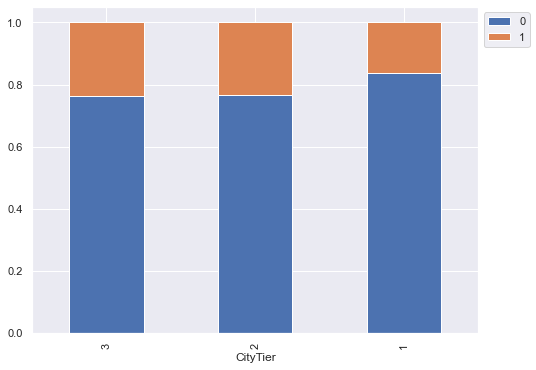



Percentage Allocation
ProdTaken         0         1
CityTier                     
3          0.764000  0.236000
2          0.767677  0.232323
1          0.836991  0.163009


<IPython.core.display.Javascript object>

In [50]:
stacked_barplot(tdata1, "CityTier", "ProdTaken")

More customers are from more heavily developed and populated cities.  However, percentage-wise, more customers from lesser developed and populated cities tended to accept offers. The acceptance rates for a tier 3 city was 23.6%, 23.2% for tier 2, and 16.3% for tier 1.

#### Product Taken vs. Product Pitched

Summary Counts
ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
-----------------------------------------------------------------------------------------------------


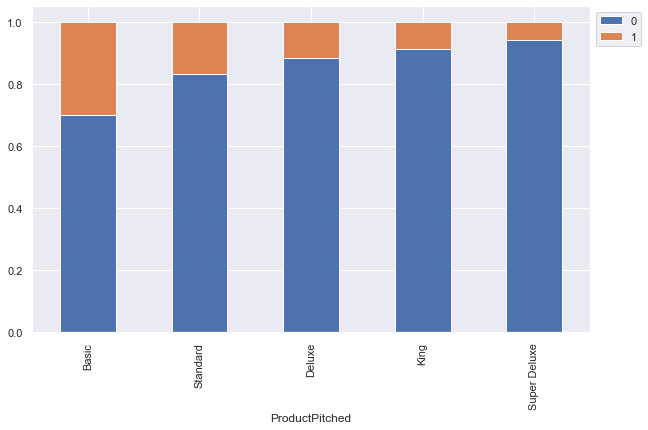



Percentage Allocation
ProdTaken              0         1
ProductPitched                    
Basic           0.700326  0.299674
Standard        0.832884  0.167116
Deluxe          0.882217  0.117783
King            0.913043  0.086957
Super Deluxe    0.941520  0.058480


<IPython.core.display.Javascript object>

In [51]:
stacked_barplot(tdata1, "ProductPitched", "ProdTaken")

The product most frequently purchased was the basic package.  The basic package was also purchase more often when offered than any other package.  Perhaps consideration should be given to also off tiered packages within a 'Wellness Tourism' category.

#### Product Taken vs. Type of Contact

Summary Counts
ProdTaken           0    1   All
TypeofContact                   
All              3968  920  4888
Self Enquiry     2859  610  3469
Company Invited  1109  310  1419
-----------------------------------------------------------------------------------------------------


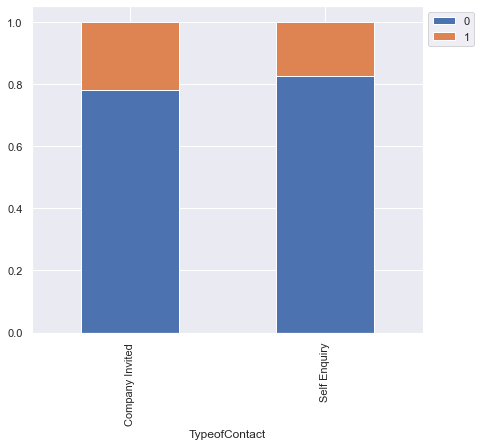



Percentage Allocation
ProdTaken               0         1
TypeofContact                      
Company Invited  0.781536  0.218464
Self Enquiry     0.824157  0.175843


<IPython.core.display.Javascript object>

In [52]:
stacked_barplot(tdata1, "TypeofContact", "ProdTaken")

More customers that contacted the company directly purchased packages.  However, this is simply because overall more customers contacted the company for information than those contacted by the company.  However, percentage wise, more purchases were made by customers who were contacted by the company.  This suggests that these individuals were more targeted then random, curious general public enquiries.  

#### Product Taken vs. Occupation

Summary Counts
ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
-----------------------------------------------------------------------------------------------------


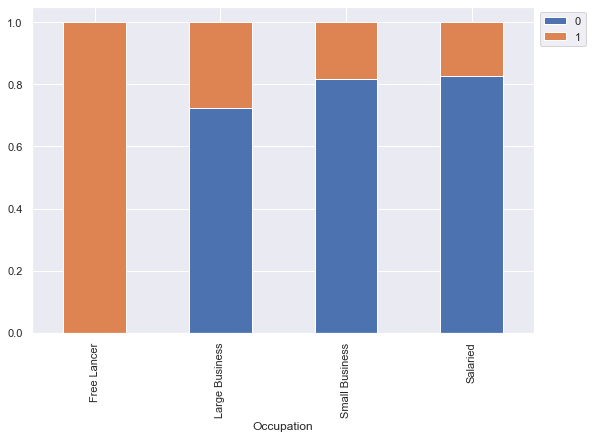



Percentage Allocation
ProdTaken              0         1
Occupation                        
Free Lancer     0.000000  1.000000
Large Business  0.723502  0.276498
Small Business  0.815739  0.184261
Salaried        0.825169  0.174831


<IPython.core.display.Javascript object>

In [53]:
stacked_barplot(tdata1, "Occupation", "ProdTaken")

Generally, more salaried customers purchased packages than any of the other categories, because there are more customers fitting into the salaried category than any of the others.  Statistically, 27.6% of the large business customers purchased packages, followed by small business customers at 18.4%, whereas salaried customers are last with only 17.4%.  There were only 2 customers in the 'free lancer' category and both of them purchased packages.  This really isn't a large enough sample size to assess accurately.

#### Product Taken vs. Gender

Summary Counts
ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1630  342  1972
-----------------------------------------------------------------------------------------------------


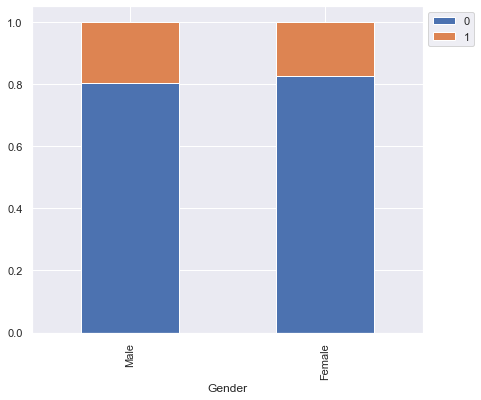



Percentage Allocation
ProdTaken         0         1
Gender                       
Male       0.801783  0.198217
Female     0.826572  0.173428


<IPython.core.display.Javascript object>

In [54]:
stacked_barplot(tdata1, "Gender", "ProdTaken")

Again, there are more male customers than female customers in the data set, which leads to a higher number of purchases from men.  When looking at the percentage allocation, the two genders are much more evenly distributed with 19.8% of males and 17.3% of females of each gender respectively purchasing packages. Because the percentage purchases are so close, this feature doesn't hold much value for analysis and can be dropped. 

In [55]:
# drop 'Gender' from dataset
tdata2 = tdata1.drop("Gender", axis=1)

<IPython.core.display.Javascript object>

#### Product Taken vs. Marital Status

Summary Counts
ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
-----------------------------------------------------------------------------------------------------


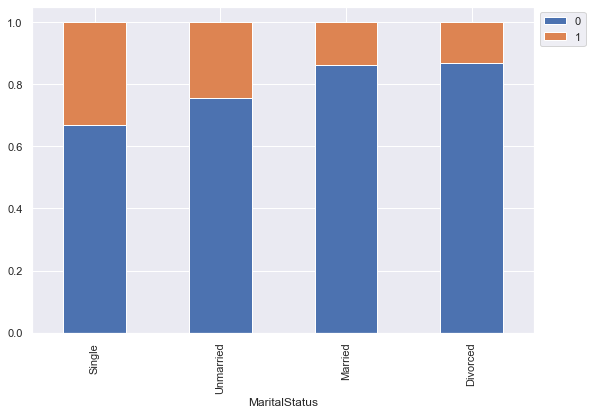



Percentage Allocation
ProdTaken             0         1
MaritalStatus                    
Single         0.668122  0.331878
Unmarried      0.756598  0.243402
Married        0.860684  0.139316
Divorced       0.869474  0.130526


<IPython.core.display.Javascript object>

In [56]:
stacked_barplot(tdata2, "MaritalStatus", "ProdTaken")

While married customers make up more of the data set than any other category in this feature and account for the most purchases, when looking at the percentage of purchase in each category, more singles purchased packages than any other category. 

#### Product Taken vs. Designation

Summary Counts
ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
-----------------------------------------------------------------------------------------------------


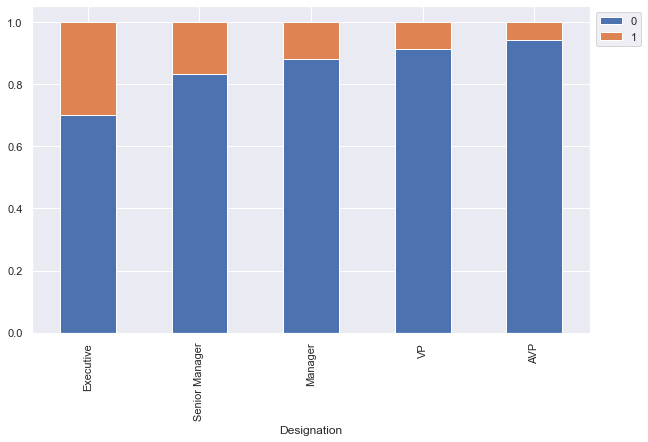



Percentage Allocation
ProdTaken              0         1
Designation                       
Executive       0.700326  0.299674
Senior Manager  0.832884  0.167116
Manager         0.882217  0.117783
VP              0.913043  0.086957
AVP             0.941520  0.058480


<IPython.core.display.Javascript object>

In [57]:
stacked_barplot(tdata2, "Designation", "ProdTaken")

More customers were designated as 'Executive' than any other category and also more packages were purchased by Executives than any other category.  29.9% of Executives offered packages purchased them.  Followed by 16.7% of senior managers, then 11.7% of managers, 8.6% of VPs and 5.8% of AVPs. 

In [58]:
### function to plot distributions wrt target
## w.r.t.- with respect to target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

#### Product Taken vs. Age

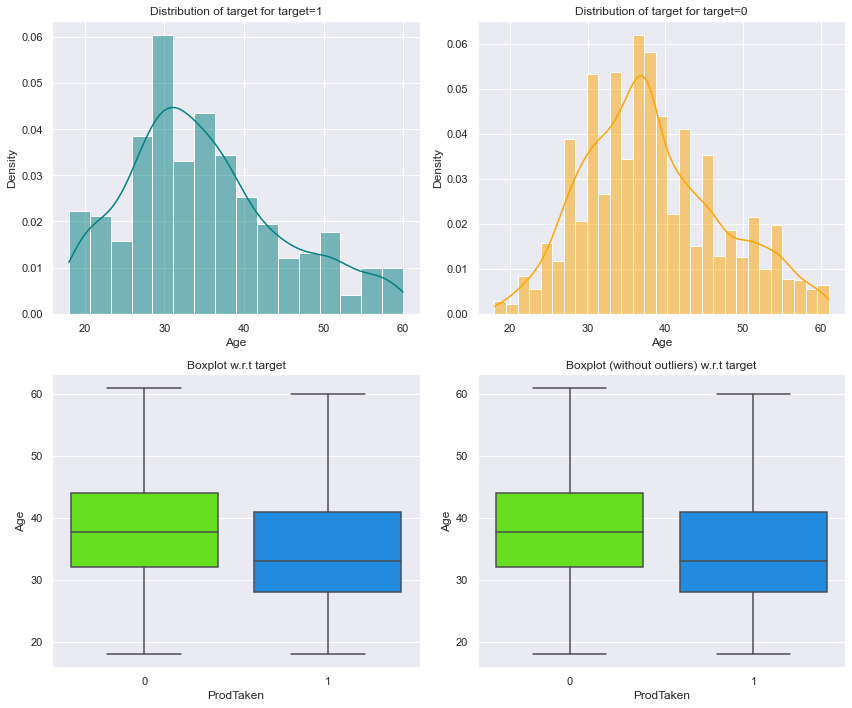

<IPython.core.display.Javascript object>

In [59]:
distribution_plot_wrt_target(tdata2, "Age", "ProdTaken")

More slightly younger customers accepted more packages than their older counterparts.  Perhaps the wellness packages will appeal more to an older demographic.


#### Product Taken vs. Monthly Income

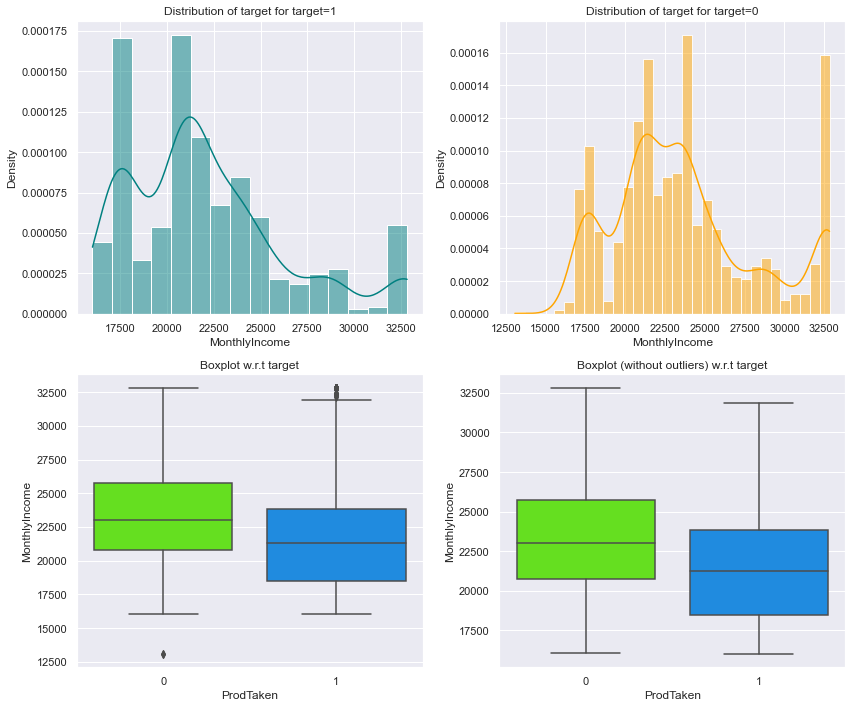

<IPython.core.display.Javascript object>

In [60]:
distribution_plot_wrt_target(tdata2, "MonthlyIncome", "ProdTaken")

Customers with lower incomes appear more likely to accept an offer for a package than those with higher income.

#### Product Taken vs. Duration of Pitch

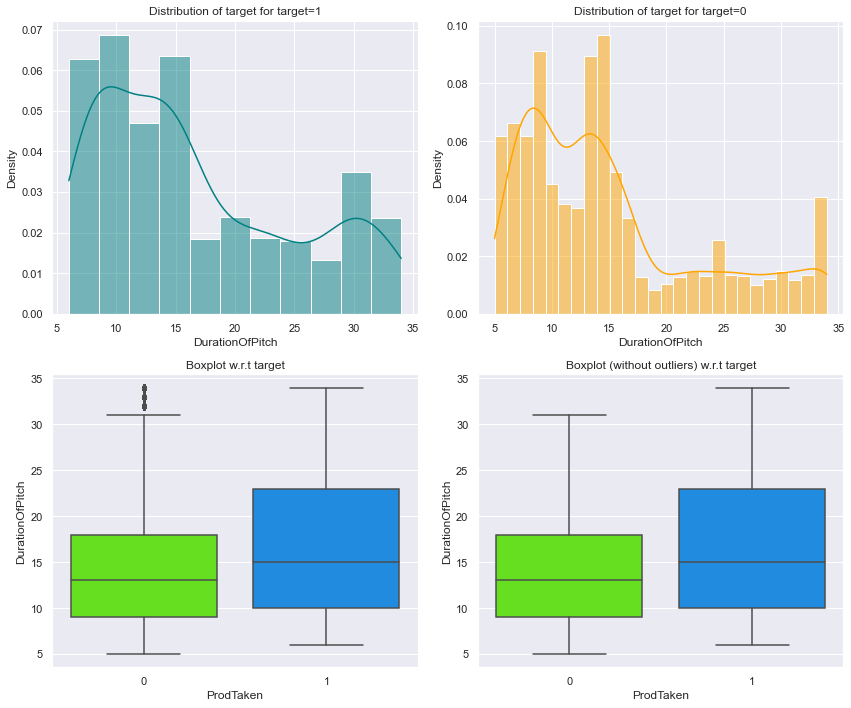

<IPython.core.display.Javascript object>

In [61]:
distribution_plot_wrt_target(tdata2, "DurationOfPitch", "ProdTaken")

The average duration of pitch is slightly higher for those who accepted an offer as opposed to those who didn't, but only slightly by a margin of a few minutes.

#### Product Taken and Number of Follow Ups

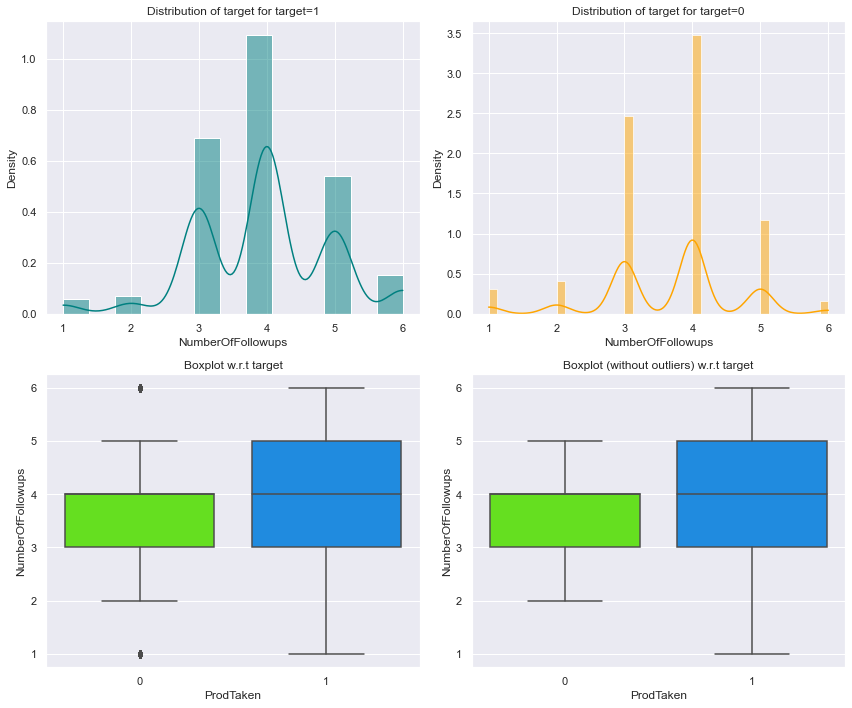

<IPython.core.display.Javascript object>

In [62]:
distribution_plot_wrt_target(tdata2, "NumberOfFollowups", "ProdTaken")

The majority of follow up calls that didn't not result in a purchase average between 3 & 4.  Whereas those customers who did purchase a package received between 3 and 5 follow up calls, on average. 

### Summary of Exploratory Data Analysis

#### Univariate Analysis

* *CustomerID* - Identifier that is unique to each individual customer.  This column was immediately dropped.
* *ProdTaken* - This is the target variable.  From the total data set of 4888 samples, only 920 customers accepted offers for a travel package, whereas 3698 did not.  This is not a very balanced data set.
* *TypeofContact* - Of the whole data set, only 1419 customers were contacted by the company, the remaining 3469 were random call-ins from the general public
* *Occupation* - The majority of customers are salaried individuals, followed by small business.
* *Gender* - The allocation of male to female customers is soewhat skewed towards male customers.
* *PackagePitched* - The most frequently pitched package was the Basic package, followed by the Deluxe package.
* *MaritalStatus* - The majority of customers were married.
* *Designation* - Most often listed was 'Executive' followed rather closely by 'Manager'.
* *CityTier* - The majority of customers live in the most developed and populated cities, followed by the least developed or populated.
* *NumberOfPersonVisiting* - Most enquiries for travel packages were for groups of three.
* *NumberOfFollowups* - Most common number of follow-ups was four.
* *PreferredPropertyStar* - A preference for 3-star accommodations was most frequent.
* *NumberOfTrips* - With exception of some extreme outliers, which were capped, most customers took 2 trips per year.
* *Passport* - Most often, customers had passports.
* *OwnCar* - More customers own cars than do not.
* *PitchSatisfactionScore* - Average survey result was a 3 for pitch satisfaction.
* *NumberOfChildrenVisiting* - Most often travel plans included traveling with 1 child under the age of 5.
* *Age* - Fairly normally distributed with median and mean age around 37 years old. 
* *DurationOfPitch* - This feature is slightly skewed, after capping extreme outliers, with a mean of 15 and a median of 13.
* *MonthlyIncome* - This feature is somewhat normally distributed, after capping outliers, with a mean of approximately 24k and a median of approximately 23k.


#### Bivariate Analysis

##### Correlation summary
* The highest correlated features are 'NumberOfChildrenVisting' and 'NumberofPersonsVisiting' with a correlation of 0.61.
* 'Age' and 'MonthlyIncome' have a correlation of 0.47.
* There is a negative correlation of -0.14 between 'MonthlyIncome' and 'Age' and 'ProdTaken', respectively.

##### ProdTaken with respect to 'NumberofPersonsVisiting' and 'NumberOfChildrenVisiting'
*  Not much difference between the number of persons visiting and number of children visiting with regards to whether or not the customer accepted an offer. 
* Majority of customers accepting offers were groups of 2 or 3, with at least 1 or 2 children under 5 years old.

##### ProdTaken with respect to all aspects of Sales Activities
* The average acceptable length of an initial sales pitch ranged from 10-23 minutes.
* The range of successful follow-up calls is between 3 and 5 calls.
* Those customers who scored the sales pitch in the mid-range of 2-4 were just as likely to accept an offer as not.

##### ProdTaken with respect to Number of Trips and Preferred Property Star
* Most frequently customers took 2 to 4 trips per year, regardless of accepting offer or not.
* 26.1 % of customers interested in 5-star accommodations accepted a package over 3 or 4, with 19.9% and 16.1% respectively.

#### ProdTaken and Number of Trips
* While the most frequent number of trips taken was 2 per year, then 3 per year, the most fequently purchased packages were made by customers who traveled 7 times per year, then 3 times per year.

##### ProdTaken and Passports
* Customers with passports were more likely to accept a package offering.

##### ProdTaken and OwnCars
* More customers own cars than do not.
* This feature does not appear to have much influence on purchasing a package, with 18% of those owning a car accepting an offer and 19% of those without a car. 
* This feature is dropped to minimize noise and will not add value to model. 

##### ProdTaken and CityTier
* More customers are from the most heavily developed and populated areas.
* More customers from lesser developed and populated areas accepted more packages, with Tier3 having a 23.2% acceptance rate, followed by Tier 2 then Tier 1 with 23.2% and 16.3% respectively.

##### ProdTaken and ProductPitched
* The product most frequently pitched and purchased was the Basic Package.

##### ProdTaken and TypeOfContact
* More customers contacted the company directly than were contacted by the company.
* Customers who were contacted by the company were more likely to accept an offer.  
* Acceptance rate for customers contacted by the company was 21.8% whereas those contacting the company was 17.5%.

##### ProTaken and Occupation
* More Salaried individuals purchased packages than any other category, as this was the category with the highest number of members.
* Statistically, 27.6% of Large Business customers offered, purchased packages, as opposed to only 17.4% of Salaried customers.

##### ProdTaken and Gender
* There are more male than female customers in the data set, leading to more purchases by males.
* The acceptance rate was fairly equal, with 19.8% of males, and 17.3% of females.
* This feature was dropped because doesn't really add value to modeling and will reduce noise.

##### ProdTaken and Marital Status
* Most customers are married, leading to a higher count of purchases from this category.
* From a statistical standpoint, 33.2% of Single customers purchased packages followed by Unmarried and then Married with rates of 24.3% and 13.9% respectively.

##### ProdTaken and Designation
* More customers designated 'Executive' than any other category.
* Executives also accepted offers more frequently than other categories at a rate of 29.9%, followed by Senior Managers at 16.7%.

##### ProdTaken and Age
* More slightly younger customers accepted packages than their older counterparts.  
* This explains the negative correlation.

##### ProdTaken and MonthlyIncome
* Customers with lower incomes accepted an offer more often than those with a higher income.
* This explains the negative correlation.

##### ProdTaken and DurationofPitch
* The average duration of pitch was slightly higher for those who accepted an offer.

##### ProdTaken and NumberOfFollowups
* Follow up calls that resulted in acceptance of offers range between 3 and 5. 

#### Feature Summary of Most Frequent Package Offers Accepted
* Travel group size was 2 or 3 members with 1 to 2 children
* Sales pitch lasting 10-23 minutes
* 3-5 follow up calls
* Preference of 5-star accommodations
* Has passport
* Lives in least developed or populated city areas of 3 tiers
* Preferred Basic Package
* Large business customers
* Single customers
* Executive business designation
* Younger customers purchased more packages than older customers
* Customers with lower monthly income purchased more packages


##### Customer Interaction Data
While all the customer interaction data is useful from a sales and marketing strategy standpoint, the are not very useful in determining the customer profile needed to build the model that will predict the characteristics of the potential customer who is more likely to purchase the newly created Wellness Tourism Package currently being offered.  Therefore those categories will be dropped prior to final data preparation for modeling.

In [63]:
tdata2.drop(
    [
        "PitchSatisfactionScore",
        "NumberOfFollowups",
        "ProductPitched",
        "DurationOfPitch",
    ],
    inplace=True,
    axis=1,
)

<IPython.core.display.Javascript object>

### Preparing data for Modeling

In [64]:
# create dummy columns
tdata3 = pd.get_dummies(tdata2)

<IPython.core.display.Javascript object>

In [65]:
# separate target variable from other features
x = tdata3.drop("ProdTaken", axis=1)
y = tdata3["ProdTaken"]

<IPython.core.display.Javascript object>

In [66]:
# split the data into training and testing data sets
# as determined during EDA, there is significant imbalance in the distribution of the target variable
# therefore it is necessary to stratify the sampling to ensure class distribution is similar between
# the training and testing data sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=42, stratify=y
)
print(
    f"The shape of the training data set is {x_train.shape} and the shape of the testing data set is {x_test.shape}."
)

The shape of the training data set is (3421, 23) and the shape of the testing data set is (1467, 23).


<IPython.core.display.Javascript object>

In [67]:
# verify the class distribution of the target variable are similar between the training and
# and testing data sets
print("Class Distribution for y_train data set")
print(y_train.value_counts(1))

Class Distribution for y_train data set
0    0.811751
1    0.188249
Name: ProdTaken, dtype: float64


<IPython.core.display.Javascript object>

In [68]:
print("Class Distribution for y_test data set")
print(y_test.value_counts(1))

Class Distribution for y_test data set
0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64


<IPython.core.display.Javascript object>

### Model Evaluation Criteria

#### Possible Incorrect Predictions:

1.  Customer predicted not to purchase travel package but does
2.  Customer predicted to buy travel package but does not

####  More Critical Incorrect Prediction:

Predicting a customer will purchase a travel package, but does not, is more important than predicting a customer will not purchase a travel package but does.  This is considered a False Positive.  This is due to the cost factor in targeting a specific demographic with marketing and sales campaigns.  If more of that demographic doesn't purchase a travel package then the investment in the campaigns is lost. 

#### Strategy to Reduce False Positives:

To reduce False Positives the Precision metric should be maximized.  Precision is the ratio of all true positives, divided by the total number of predicted positives.  For this model it will compare the number of customers who were predicted to purchase a travel package and actually did to the total number of customers who were predicted to purchase a travel package.  Therefore, the higher the Precision score, the the better the chance of minimizing False Positives.   This model will help assess the features and target demographics to focus future sales and marketing campaigns thereby maximizing the financial investment in those campaigns. Note, because the class distribution on the target variable is very unbalanced, the F1 score will be used for model tuning. 



#### Performance Metric Overview

While Precision is the primary metric to optimize, the four essential metrics will be computed for reach model.

* *Accuracy* is the percentage of correct predictions, both True Positives and True Negatives. It is calculated by dividing the number of correct predictions by the total number of predictions.
* *Recall* is the percentage of True Positives in relation to all actual positives.  It is most important when the cost of a False Negative is high. 
* *Precision* is the percentage of True Positives of all predicted positives.  It measures how precise the model is out of all predicted positives.  It is more significant when the costs of False Positives is high. 
* *F1* is the weighted average of Precision and Recall.  It is used when the goal is a balance between Precision and Recall and there is an uneven class distribution. 

#### Confusion Matrix Overview

* *True Positive* - Customer purchased a vacation package and model predicted customer would make purchase
* *False Positive* - Customer DID NOT purchase a vacation package and model predicted that customer would make purchase
* *True Negative* - Customer did not purchase vacation package and model predicted that customere would not make purchase
* *False Negative* - Customer purchased a vacation package and model predicted customer WOULD NOT make purchase


In [69]:
# function to compute performance metrics to check performance of a classification model
# built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [70]:
# function to generate confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

#### Decision Tree Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.854806  0.619565   0.612903  0.616216


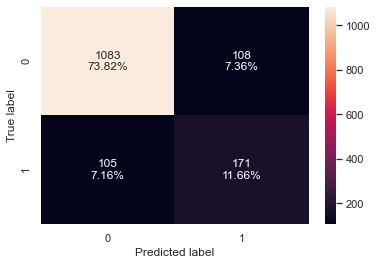

<IPython.core.display.Javascript object>

In [71]:
# Fit the model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(x_train, y_train)

# Calculate metrics
dtree_model_train_perf = model_performance_classification_sklearn(
    dtree, x_train, y_train
)
print("Training performance:\n", dtree_model_train_perf)
dtree_model_test_perf = model_performance_classification_sklearn(dtree, x_test, y_test)
print("Testing performance:\n", dtree_model_test_perf)

# Create confusion matrix
confusion_matrix_sklearn(dtree, x_test, y_test)

In [72]:
# review parameters for the Decision Tree Model to assist with hyperparameter tuning
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

<IPython.core.display.Javascript object>

* The Decision Tree was a perfect fit on the training data, but is rather underfit for the testing data.
* From the confusion matrix it is evident, True Positives and True Negatives carry the most weight.  However, False Negatives and False Positives are about equal with their distributions.
* Next review Feature Importance for this model. 

In [73]:
print(
    pd.DataFrame(
        dtree.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
MonthlyIncome                  0.182522
Age                            0.180145
NumberOfTrips                  0.108311
Designation_Executive          0.085602
Passport                       0.074984
CityTier                       0.056901
PreferredPropertyStar          0.048368
NumberOfChildrenVisiting       0.040680
Occupation_Salaried            0.027747
NumberOfPersonVisiting         0.025843
TypeofContact_Self Enquiry     0.022551
MaritalStatus_Single           0.022033
MaritalStatus_Married          0.018891
TypeofContact_Company Invited  0.018636
Occupation_Small Business      0.017184
MaritalStatus_Unmarried        0.016039
Occupation_Large Business      0.015140
Designation_Manager            0.014307
MaritalStatus_Divorced         0.011856
Designation_Senior Manager     0.006737
Designation_AVP                0.005521
Occupation_Free Lancer         0.000000
Designation_VP                 0.000000


<IPython.core.display.Javascript object>

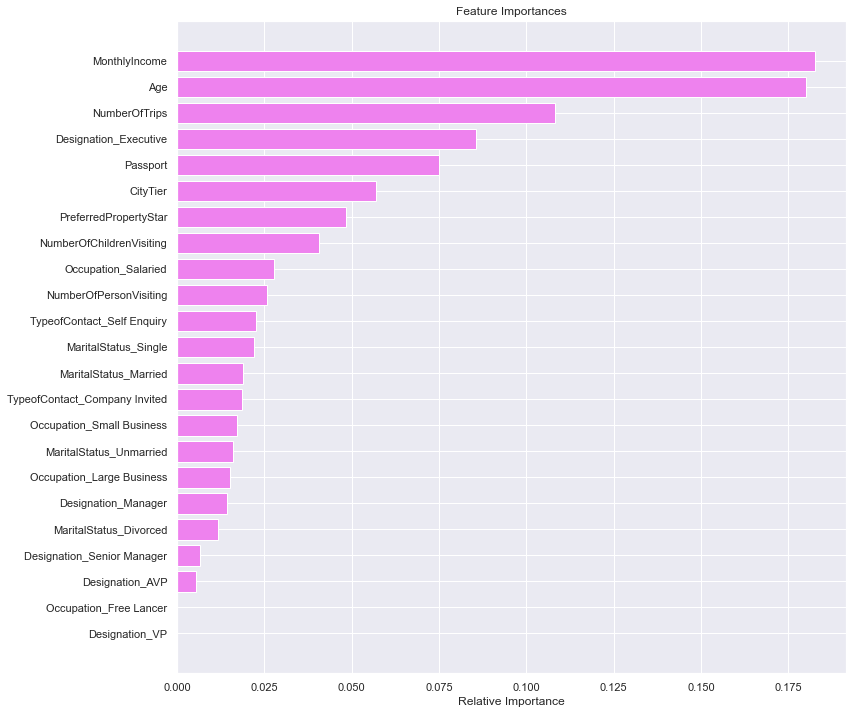

<IPython.core.display.Javascript object>

In [74]:
feature_names = x_train.columns
importances = dtree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

For the Decision Tree Classifier, MonthlyIncome is the most important feature, followed by Age, NumberOfTrips, Designation_Executive, and Passport.

#### Hyperparameter Tuning for Decision Tree

In [75]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(
    class_weight={0: 0.81, 1: 0.19}, random_state=42
)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 25),
    "min_samples_leaf": [1, 3, 5, 8, 12],
    "max_leaf_nodes": [5, 7, 10, 11, 15, 20],
    "min_impurity_decrease": [0.00001, 0.0001, 0.001, 0.01],
}

# Type of scoring used to compare parameter combinations-While Precision is the performance metric, F1
# is being used to hyperparameter tune the models because when using Precision, the metric score for
# Precision is very high however the counts of True Positives are extremely low in comparison
# to False Negatives.  Because F1 is a blend of Precision and Recall it will also help maximize
# True Positives as both metrics place emphasis on True Positives.
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.81, 1: 0.19}, max_depth=8,
                       max_leaf_nodes=20, min_impurity_decrease=1e-05,
                       min_samples_leaf=8, random_state=42)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.845075  0.181677      0.975  0.306283
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.833674  0.123188   0.944444  0.217949


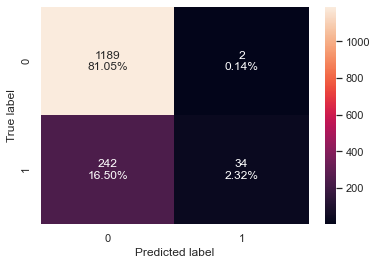

<IPython.core.display.Javascript object>

In [76]:
# Calculate metrics
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    dtree_estimator, x_train, y_train
)
print("Training performance:\n", dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    dtree_estimator, x_test, y_test
)
print("Testing performance:\n", dtree_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator, x_test, y_test)

* Overfitting has decreased for all metrics, much more significantly for both Recall and F1 than Precision and Accuracy. 
* Metrics for training and testing are more similar.
* Reviewing the Confusion Matrix, it is evident this is not a good model because, while the Precision score is high, the number of False Negatives far outweighs the number of True Positives making this model worse fitting than the untuned Decision Tree model.  
* This suggest the customer profile generated by this model is too narrow in scope. 
* Next review Feature Importance for this model.

In [77]:
print(
    pd.DataFrame(
        dtree_estimator.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
Age                            0.212055
Designation_Executive          0.184184
Passport                       0.128827
CityTier                       0.127562
PreferredPropertyStar          0.082425
NumberOfTrips                  0.057949
TypeofContact_Self Enquiry     0.047603
Designation_AVP                0.044620
Occupation_Large Business      0.044441
MaritalStatus_Married          0.036064
MaritalStatus_Divorced         0.019793
MaritalStatus_Unmarried        0.014478
TypeofContact_Company Invited  0.000000
Occupation_Free Lancer         0.000000
MonthlyIncome                  0.000000
Occupation_Salaried            0.000000
Occupation_Small Business      0.000000
MaritalStatus_Single           0.000000
NumberOfChildrenVisiting       0.000000
NumberOfPersonVisiting         0.000000
Designation_Manager            0.000000
Designation_Senior Manager     0.000000
Designation_VP                 0.000000


<IPython.core.display.Javascript object>

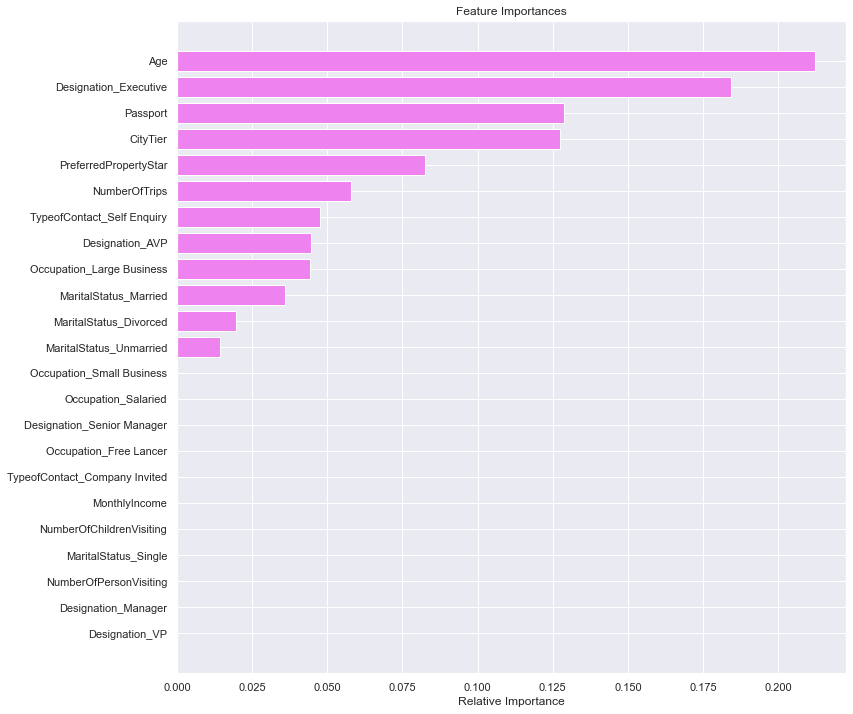

<IPython.core.display.Javascript object>

In [78]:
feature_names = x_train.columns
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

For the tuned Decision Tree Estimator, Age was the most important feature, followed by Designation_Executive, Passport and CityTier.

#### Random Forest

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.880709  0.48913   0.798817  0.606742


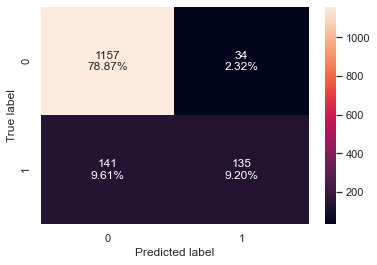

<IPython.core.display.Javascript object>

In [127]:
# Fit the model
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

# Calculate metrics
rf_model_train_perf = model_performance_classification_sklearn(rf, x_train, y_train)
print("Training performance:\n", rf_model_train_perf)
rf_model_test_perf = model_performance_classification_sklearn(rf, x_test, y_test)
print("Testing performance:\n", rf_model_test_perf)

# Create confusion matrix
confusion_matrix_sklearn(rf, x_test, y_test)

In [81]:
# review parameters for Random Forest Model to assist with hyperparameter tuning
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

* Once again, this model fits the training data perfectly.  However, is overfit on the testing data, although the testing metrics reflect a better fit than the Decision Tree model. 
* On the Confusion Matrix, True Positives are almost equal to False Negatives, again, suggesting this model is too narrow in scope when generating the profile of customers most likely to purchase the new package. 
* False Positives are fairly low but True Negatives are the lowest of any model thus far. 
* Next review Feature Importance for this model. 

In [82]:
print(
    pd.DataFrame(
        rf.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
MonthlyIncome                  0.188051
Age                            0.176122
NumberOfTrips                  0.088619
Passport                       0.086664
PreferredPropertyStar          0.058094
NumberOfChildrenVisiting       0.048149
CityTier                       0.045519
NumberOfPersonVisiting         0.041882
Designation_Executive          0.041695
MaritalStatus_Single           0.024694
Occupation_Small Business      0.024241
Occupation_Salaried            0.023066
TypeofContact_Self Enquiry     0.021495
TypeofContact_Company Invited  0.020530
MaritalStatus_Married          0.020506
Designation_Manager            0.018826
MaritalStatus_Unmarried        0.018289
Occupation_Large Business      0.017352
MaritalStatus_Divorced         0.015111
Designation_Senior Manager     0.011308
Designation_AVP                0.006051
Designation_VP                 0.003584
Occupation_Free Lancer         0.000150


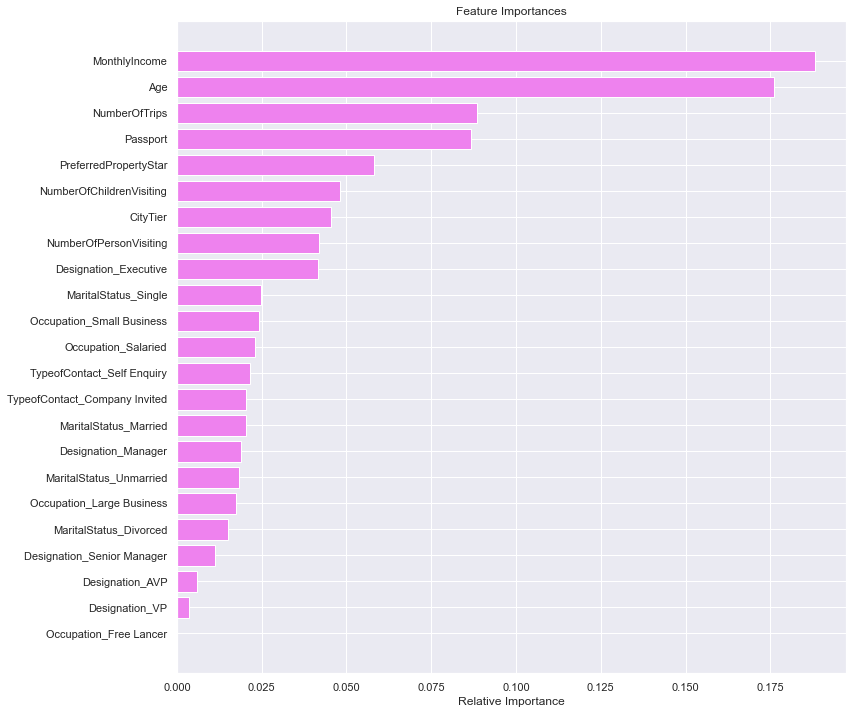

In [83]:
feature_names = x_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

For the Random Forest model, the most important feature is MonthlyIncome followed very closely by Age.  NumberOfTrips then Passport and PreferredPropertyStar.  

#### Hyperparameter Tuning for Random Forest

In [79]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(
    class_weight={0: 0.81, 1: 0.19}, random_state=42, oob_score=True, bootstrap=True
)

parameters = {
    "max_depth": list(np.arange(2, 27, 5)) + [None],
    "max_features": ["sqrt", "log2", None],
    "min_samples_leaf": np.arange(1, 15, 5),
    "min_samples_split": np.arange(2, 20, 5),
    "n_estimators": np.arange(50, 150, 10),
}


# Type of scoring used to compare parameter combinations-While Precision is the performance metric, F1
# is being used to hyperparameter tune the models because when using Precision, the metric score for
# Precision is very high however the counts of True Positives are extremely low in comparison
# to False Negatives.  Because F1 is a blend of Precision and Recall it will also help maximize
# True Positives as both metrics place emphasis on True Positives.
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.81, 1: 0.19}, max_depth=17,
                       max_features=None, n_estimators=90, oob_score=True,
                       random_state=42)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.998538  0.992236        1.0  0.996103
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.895706  0.619565   0.780822  0.690909


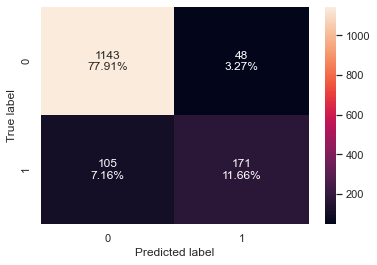

<IPython.core.display.Javascript object>

In [83]:
# Calculate metrics
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, x_train, y_train
)
print("Training performance:\n", rf_tuned_model_train_perf)
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, x_test, y_test
)
print("Testing performance:\n", rf_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(rf_tuned, x_test, y_test)

* This model is overfit.  While Precision and essentially the other 3 metrics are perfectly fit on the training data, for the testing data, they all drop significantly. 
* Regarding the confusion matrix, the count of True Positives increased and False Negatives decreased in comparison to the untuned Random Forest model. This model is better at correctly identifying potential customers without missing unrecognized ones.
* Next review Feature Importance for this model.


In [84]:
print(
    pd.DataFrame(
        rf_tuned.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
MonthlyIncome                  0.254310
Age                            0.189248
NumberOfTrips                  0.093935
CityTier                       0.048751
Designation_Executive          0.047716
PreferredPropertyStar          0.047700
NumberOfChildrenVisiting       0.041966
NumberOfPersonVisiting         0.035049
Passport                       0.028551
Occupation_Small Business      0.025445
MaritalStatus_Unmarried        0.024608
TypeofContact_Self Enquiry     0.024403
MaritalStatus_Single           0.024185
Occupation_Large Business      0.021704
Occupation_Salaried            0.019310
MaritalStatus_Married          0.017678
TypeofContact_Company Invited  0.015338
Designation_Manager            0.012670
MaritalStatus_Divorced         0.011444
Designation_Senior Manager     0.009449
Designation_AVP                0.003870
Designation_VP                 0.002575
Occupation_Free Lancer         0.000097


<IPython.core.display.Javascript object>

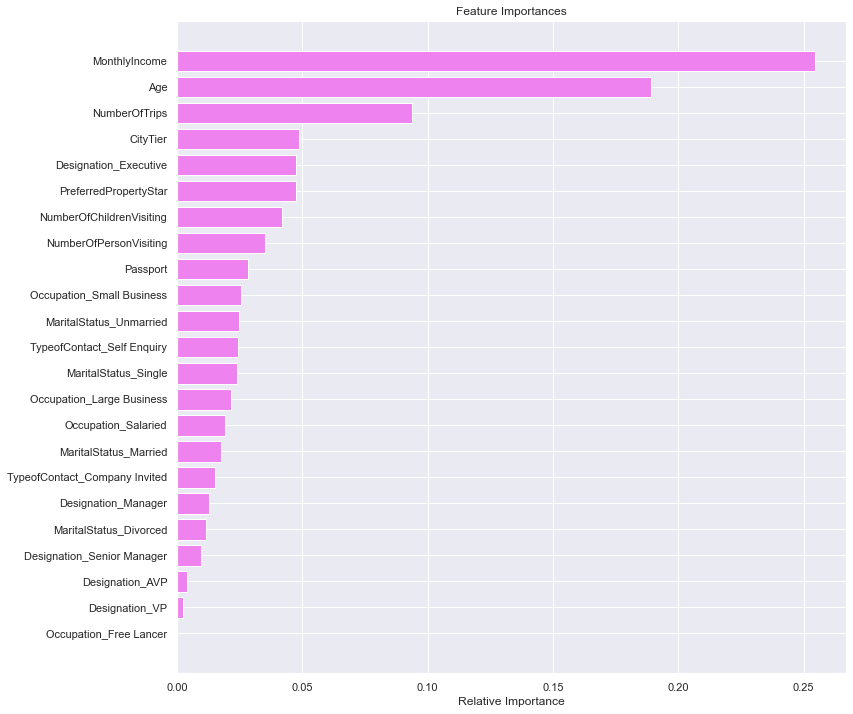

<IPython.core.display.Javascript object>

In [85]:
feature_names = x_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

As with the Random Forest model, the most important features for the tuned Random Forest are MonthlyIncome, and then Age.  Next came NumberOfTrips and CityTier.  

#### Bagging Classifier

   Accuracy    Recall  Precision        F1
0  0.990938  0.953416   0.998374  0.975377
   Accuracy    Recall  Precision        F1
0  0.886162  0.547101   0.782383  0.643923


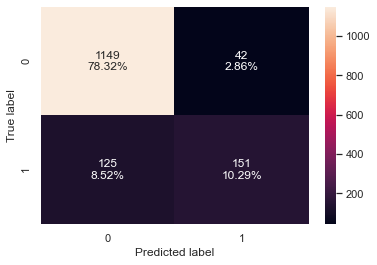

<IPython.core.display.Javascript object>

In [86]:
# Fit the model
bagging = BaggingClassifier(random_state=42)
bagging.fit(x_train, y_train)

# Calculate different metrics
bagging_model_train_perf = model_performance_classification_sklearn(
    bagging, x_train, y_train
)
print(bagging_model_train_perf)
bagging_model_test_perf = model_performance_classification_sklearn(
    bagging, x_test, y_test
)
print(bagging_model_test_perf)

# Create confusion matrix
confusion_matrix_sklearn(bagging, x_test, y_test)

In [87]:
# review parameters for Bagging Model
bagging.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

<IPython.core.display.Javascript object>

* The training data set for the Bagging classifier is not quite as overfit as the previous models, but still is overfit, as evident by the somewhat significant difference in the metrics between the training and testing data sets.
* With the Confusion Matrix there are slightly lower figures for the True Positives, and and slightly higher for False Negatives, than for the tuned Random Forest model. 
* Next, review Feature Importance

In [88]:
# there is no Feature Importance implemented for the Bagging classifier, however, because the
# bagging classifier uses Decision Trees as the default base estimator, using the mean of all the
# trees in the bagging estimator provides this information

feature_importances = np.mean(
    [tree.feature_importances_ for tree in bagging.estimators_], axis=0
)
print(
    pd.DataFrame(
        feature_importances, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
MonthlyIncome                  0.211061
Age                            0.174835
Designation_Executive          0.085811
NumberOfTrips                  0.085055
Passport                       0.073649
CityTier                       0.058222
PreferredPropertyStar          0.043752
NumberOfChildrenVisiting       0.032759
MaritalStatus_Married          0.031444
NumberOfPersonVisiting         0.030465
Occupation_Small Business      0.023258
Occupation_Large Business      0.018548
TypeofContact_Self Enquiry     0.018442
MaritalStatus_Unmarried        0.017682
TypeofContact_Company Invited  0.017390
MaritalStatus_Divorced         0.016637
MaritalStatus_Single           0.016056
Occupation_Salaried            0.014765
Designation_Manager            0.010927
Designation_Senior Manager     0.010596
Designation_AVP                0.004725
Designation_VP                 0.003921
Occupation_Free Lancer         0.000000


<IPython.core.display.Javascript object>

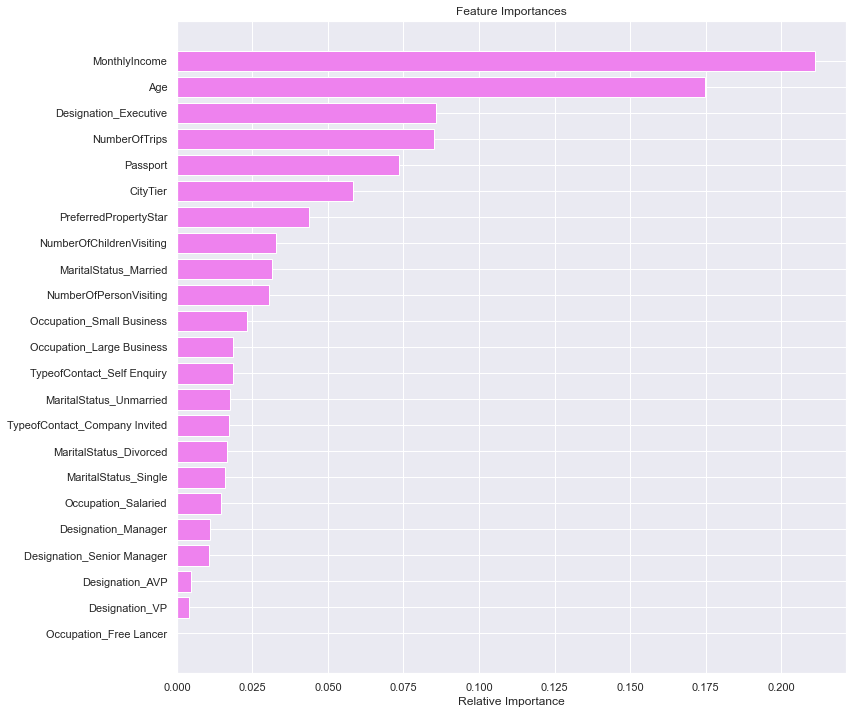

<IPython.core.display.Javascript object>

In [89]:
importances = feature_importances
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

For the Bagging Classifier, the most important feature is MonthlyIncome followed by Age.  Next are Designation_Executive, and NumberOfTrips. 

#### Hyperparameter Tuning for Bagging Classifier

In [90]:
# Choose the type of classifier.
bagging_tuned = BaggingClassifier(random_state=42)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.5, 0.7, 0.9, 1],
    "max_features": [0.5, 0.7, 0.9, 1],
    "n_estimators": [20, 40, 60, 80, 100],
}

# Type of scoring used to compare parameter combinations-While Precision is the performance metric, F1
# is being used to hyperparameter tune the models because when using Precision, the metric score for
# Precision is very high however the counts of True Positives are extremely low in comparison
# to False Negatives.  Because F1 is a blend of Precision and Recall it will also help maximize
# True Positives as both metrics place emphasis on True Positives.
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=scorer, cv=10)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
bagging_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_tuned.fit(x_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=100,
                  random_state=42)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.893661  0.576087    0.80303  0.670886


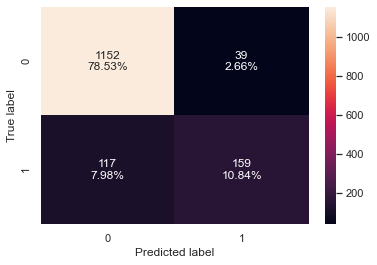

<IPython.core.display.Javascript object>

In [92]:
# Calculate metrics
bagging_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_tuned, x_train, y_train
)
print("Training performance:\n", bagging_tuned_model_train_perf)
bagging_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_tuned, x_test, y_test
)
print("Testing performance:\n", bagging_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(bagging_tuned, x_test, y_test)

* The tuned model is more overfit than the original model, with the training data being perfectly fit but the testing data not so much.  
* The testing data metrics are very slightly better in this model than in the original Bagging model.
* When comparing the Confusion Matrix, the True Positives are slightly higher and the False Negatives are slightly lower than the untuned Bagging Model. 
* Next, review Feature Importance.

In [136]:
# Again, there is no Feature Importance implemented for the Bagging classifier, however, because the
# bagging classifier uses Decision Trees as the default base estimator, using the mean of all the
# trees in the bagging estimator provides this information

clf = BaggingClassifier(DecisionTreeClassifier())
clf.fit(x, y)
feature_importances = np.mean(
    [tree.feature_importances_ for tree in clf.estimators_], axis=0
)
print(
    pd.DataFrame(
        feature_importances, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
MonthlyIncome                  0.205415
Age                            0.187610
NumberOfTrips                  0.090728
Designation_Executive          0.075931
Passport                       0.070676
CityTier                       0.048938
PreferredPropertyStar          0.046370
NumberOfChildrenVisiting       0.030603
NumberOfPersonVisiting         0.028461
MaritalStatus_Single           0.025312
MaritalStatus_Married          0.023551
Occupation_Small Business      0.023260
Occupation_Large Business      0.021483
Occupation_Salaried            0.019936
MaritalStatus_Divorced         0.018231
MaritalStatus_Unmarried        0.018050
TypeofContact_Self Enquiry     0.017664
TypeofContact_Company Invited  0.015917
Designation_Manager            0.012843
Designation_Senior Manager     0.012465
Designation_AVP                0.003591
Designation_VP                 0.002964
Occupation_Free Lancer         0.000000


<IPython.core.display.Javascript object>

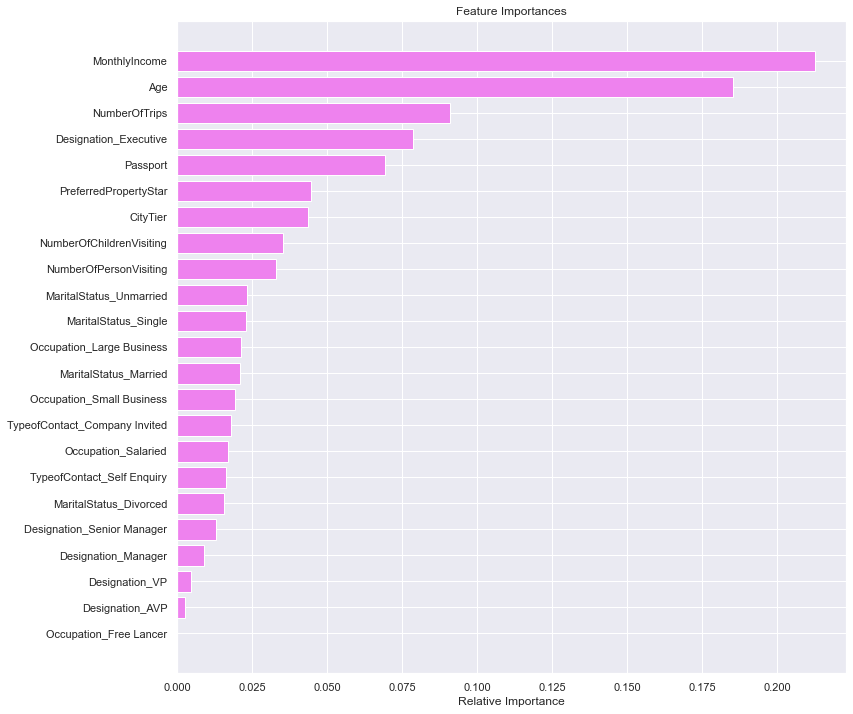

<IPython.core.display.Javascript object>

In [94]:
importances = feature_importances
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The most important feature for the Tuned Bagging Model is MonthlyIncome, followed by Age, NumberOfTrips, and Designation_Executive.

### Boosting Models

#### AdaBoost (Adaptive Boosting)

   Accuracy    Recall  Precision        F1
0  0.844782  0.310559   0.696864  0.429646
   Accuracy    Recall  Precision        F1
0  0.830948  0.282609   0.609375  0.386139


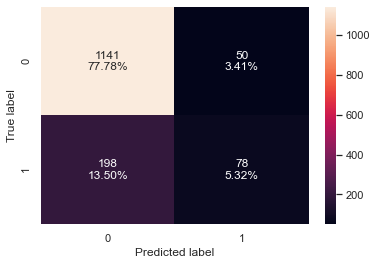

<IPython.core.display.Javascript object>

In [95]:
# Fit the model
adaB = AdaBoostClassifier(random_state=42)
adaB.fit(x_train, y_train)

# Calculate different metrics
adaB_model_train_perf = model_performance_classification_sklearn(adaB, x_train, y_train)
print(adaB_model_train_perf)
adaB_model_test_perf = model_performance_classification_sklearn(adaB, x_test, y_test)
print(adaB_model_test_perf)

# Create confusion matrix
confusion_matrix_sklearn(adaB, x_test, y_test)

In [97]:
# review parameters for the AdaBoost model for hyperparameter tuning
adaB.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}

<IPython.core.display.Javascript object>

* The AdaBoost Model is somewhat underfit. All metrics are surprisingly low on the training set smaller variances between training and testing sets.
* After reviewing the Confusion Matrix it is also evident that this model has too narrow a scope for the customer profile.  False Negatives are more than twice as much as True Positives.
* Review Importance Features

In [98]:
print(
    pd.DataFrame(
        adaB.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                Imp
MonthlyIncome                  0.46
Age                            0.20
PreferredPropertyStar          0.04
Designation_Executive          0.04
Passport                       0.04
CityTier                       0.02
Designation_Senior Manager     0.02
Designation_AVP                0.02
MaritalStatus_Unmarried        0.02
MaritalStatus_Single           0.02
Occupation_Large Business      0.02
TypeofContact_Company Invited  0.02
NumberOfChildrenVisiting       0.02
NumberOfTrips                  0.02
NumberOfPersonVisiting         0.02
Designation_VP                 0.02
Occupation_Free Lancer         0.00
Occupation_Salaried            0.00
Occupation_Small Business      0.00
MaritalStatus_Divorced         0.00
MaritalStatus_Married          0.00
TypeofContact_Self Enquiry     0.00
Designation_Manager            0.00


<IPython.core.display.Javascript object>

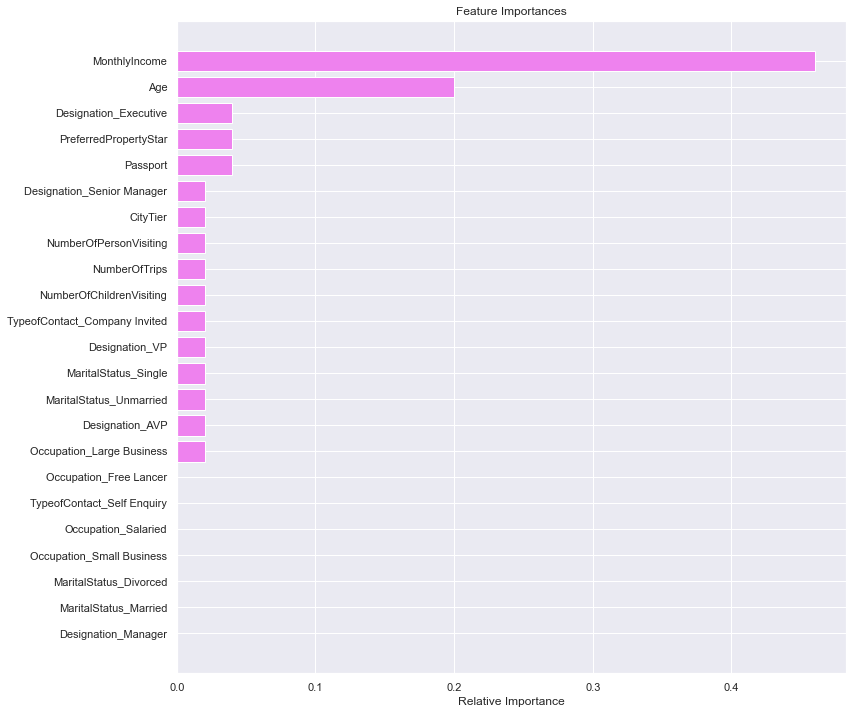

<IPython.core.display.Javascript object>

In [99]:
importances = adaB.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* For the AdaBoost Model, the most important feature is MonthlyIncome, followed by Age and Designation_Executive.  

#### Hyperparameter Tuning for AdaBoost

In [117]:
# Choose the type of classifier.
adaB_tuned = AdaBoostClassifier(random_state=42)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=4),
        DecisionTreeClassifier(max_depth=5),
        DecisionTreeClassifier(max_depth=6),
    ],
    "n_estimators": np.arange(60, 160, 10),
    "learning_rate": np.arange(0.1, 2, 0.1),
}

# Type of scoring used to compare parameter combinations-While Precision is the performance metric, F1
# is being used to hyperparameter tune the models because when using Precision, the metric score for
# Precision is very high however the counts of True Positives are extremely low in comparison
# to False Negatives.  Because F1 is a blend of Precision and Recall it will also help maximize
# True Positives as both metrics place emphasis on True Positives.
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(adaB_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
adaB_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.

adaB_tuned.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6),
                   learning_rate=0.30000000000000004, n_estimators=150,
                   random_state=42)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.884799  0.539855   0.780105  0.638116


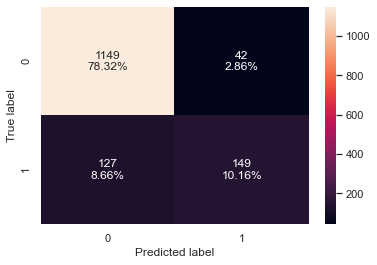

<IPython.core.display.Javascript object>

In [119]:
# Calculate metrics
adaB_tuned_model_train_perf = model_performance_classification_sklearn(
    adaB_tuned, x_train, y_train
)
print("Training performance:\n", adaB_tuned_model_train_perf)
adaB_tuned_model_test_perf = model_performance_classification_sklearn(
    adaB_tuned, x_test, y_test
)
print("Testing performance:\n", adaB_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(adaB_tuned, x_test, y_test)

* The tuned AdaBoost model is now overfit because the metrics for the training data set are all 1.0 whereas the testing set metrics are somewhat less.  However, the testing data metrics on the tuned model showed improvement over the untuned model. 
* On the Confusion Matrix True Positives has increased from 5.32% to 10.16% and False Negatives has decreased from 13.5% to 8.66% while False Positives has increased from 3.41% to 4.5%.
* Next, review Feature Importance

In [102]:
print(
    pd.DataFrame(
        adaB_tuned.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)


                                    Imp
MonthlyIncome                  0.365190
Age                            0.177737
NumberOfTrips                  0.072279
CityTier                       0.050619
PreferredPropertyStar          0.047564
NumberOfPersonVisiting         0.041722
Passport                       0.034971
NumberOfChildrenVisiting       0.030689
MaritalStatus_Single           0.019333
Designation_Executive          0.018203
MaritalStatus_Married          0.017947
Occupation_Salaried            0.015590
MaritalStatus_Unmarried        0.014252
Designation_Manager            0.013968
Occupation_Small Business      0.013955
Occupation_Large Business      0.013881
TypeofContact_Self Enquiry     0.013238
TypeofContact_Company Invited  0.013168
Designation_Senior Manager     0.012753
MaritalStatus_Divorced         0.008162
Designation_VP                 0.002661
Designation_AVP                0.002117
Occupation_Free Lancer         0.000000


<IPython.core.display.Javascript object>

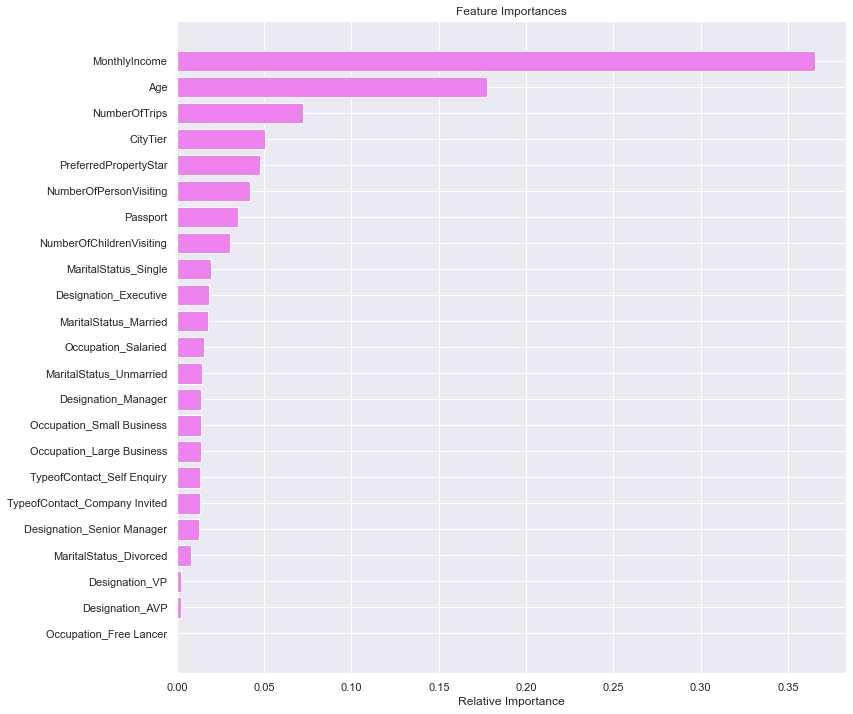

<IPython.core.display.Javascript object>

In [103]:
importances = adaB_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The most important feature using the tuned AdaBoost Model is also MonthlyIncome, followed by Age.  Next are NumberOfTrips and Designation_Executive. 

#### Gradient Boosting (GBM)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.884244  0.464286   0.854286  0.60161
Testing performance:
    Accuracy    Recall  Precision    F1
0  0.849352  0.369565   0.684564  0.48


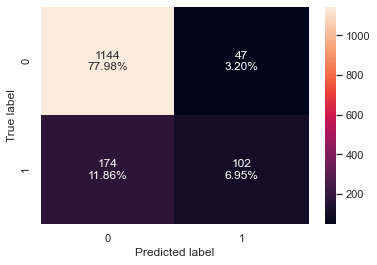

<IPython.core.display.Javascript object>

In [104]:
# Fit the model
gb = GradientBoostingClassifier(random_state=1)
gb.fit(x_train, y_train)

# Calculate different metrics
gb_model_train_perf = model_performance_classification_sklearn(gb, x_train, y_train)
print("Training performance:\n", gb_model_train_perf)
gb_model_test_perf = model_performance_classification_sklearn(gb, x_test, y_test)
print("Testing performance:\n", gb_model_test_perf)

# Create confusion matrix
confusion_matrix_sklearn(gb, x_test, y_test)

In [105]:
# review parameters from Gradient Boosting model for hyperparameter tuning
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 1,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

<IPython.core.display.Javascript object>

* The untuned Gradient Boosting model is also somewhat underfit, as was the untuned AdaBoost model.  
* The Gradient Boost model does seem to fit the testing data better than the untuned AdaBoost model did. 
* Precision and F1 are significantly lower on the testing set than on the training set. 
* From the Confusion Matrix it is evident that the model isn't fitting well because there are quite a few more False Negatives than True Positives. 
* Next, review Feature Importance

In [106]:
print(
    pd.DataFrame(
        gb.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)


                                    Imp
Passport                       0.190896
Designation_Executive          0.174240
MonthlyIncome                  0.162244
Age                            0.134300
CityTier                       0.067574
PreferredPropertyStar          0.058139
NumberOfTrips                  0.049954
MaritalStatus_Single           0.042379
MaritalStatus_Unmarried        0.021483
Occupation_Large Business      0.019528
MaritalStatus_Married          0.014406
TypeofContact_Self Enquiry     0.011921
TypeofContact_Company Invited  0.009993
Designation_Senior Manager     0.009244
Designation_Manager            0.008013
NumberOfPersonVisiting         0.007654
MaritalStatus_Divorced         0.004387
Designation_AVP                0.003991
Occupation_Salaried            0.003201
Occupation_Small Business      0.003198
NumberOfChildrenVisiting       0.002822
Designation_VP                 0.000432
Occupation_Free Lancer         0.000000


<IPython.core.display.Javascript object>

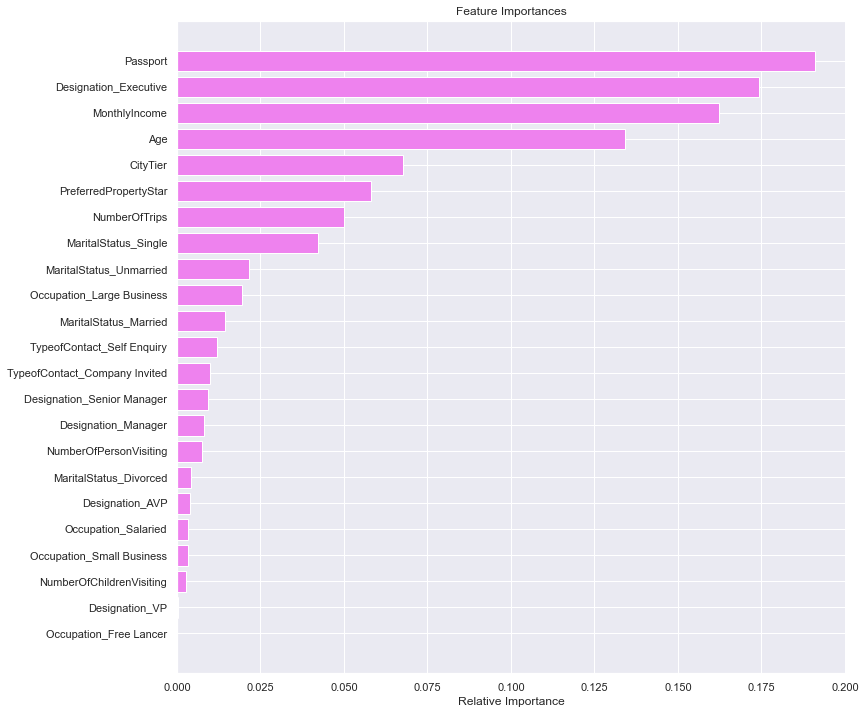

<IPython.core.display.Javascript object>

In [107]:
importances = gb.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The most important features for the Gradient Boost model are Passport and Designation_Executive, followed by MonthlyIncome and Age. 

###### Hyperparameter Tuning for Gradient Boosting (GBM)

In [108]:
# Choose the type of classifier.
gb_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=42), random_state=42
)

# Grid of parameters to choose from
parameters = {
    "loss": ["deviance", "exponential"],
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.5, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "warm_start": ["True", "False"],
}

# Type of scoring used to compare parameter combinations-While Precision is the performance metric, F1
# is being used to hyperparameter tune the models because when using Precision, the metric score for
# Precision is very high however the counts of True Positives are extremely low in comparison
# to False Negatives.  Because F1 is a blend of Precision and Recall it will also help maximize
# True Positives as both metrics place emphasis on True Positives.
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer, cv=8)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gb_tuned.fit(x_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=42),
                           max_features=0.8, n_estimators=250, random_state=42,
                           subsample=0.9, warm_start='True')

<IPython.core.display.Javascript object>

Training performance:
    Accuracy   Recall  Precision        F1
0  0.912599  0.59472   0.909739  0.719249
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.858896  0.413043   0.716981  0.524138


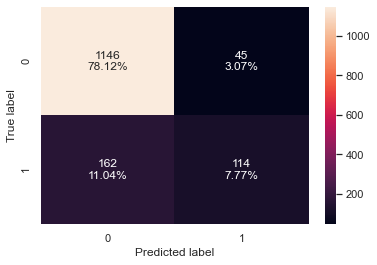

<IPython.core.display.Javascript object>

In [109]:
# Calculate metrics
gb_tuned_model_train_perf = model_performance_classification_sklearn(
    gb_tuned, x_train, y_train
)
print("Training performance:\n", gb_tuned_model_train_perf)
gb_tuned_model_test_perf = model_performance_classification_sklearn(
    gb_tuned, x_test, y_test
)
print("Testing performance:\n", gb_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gb_tuned, x_test, y_test)

* Performance metrics for the training data increase for the tuned Gradient Boost model over the untuned model.  
* However, for the testing data, Accuracy and Precision decreased and Recall and F1 only increased slightly. 
* With regards to the Confusion Matrix, there was a slight decrease in False Negative and a slight increase in True Positives, but also a slight increase in False Positives and a decrease in True Negatives.
* Next, review Feature Importance. 

In [110]:
print(
    pd.DataFrame(
        gb_tuned.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)


                                    Imp
MonthlyIncome                  0.225624
Age                            0.151700
Passport                       0.147317
Designation_Executive          0.137154
CityTier                       0.059893
PreferredPropertyStar          0.051071
NumberOfTrips                  0.042861
MaritalStatus_Single           0.033866
MaritalStatus_Unmarried        0.021482
Occupation_Large Business      0.020718
MaritalStatus_Married          0.015404
Designation_Senior Manager     0.014183
Designation_Manager            0.013279
TypeofContact_Company Invited  0.012344
NumberOfChildrenVisiting       0.010173
NumberOfPersonVisiting         0.008388
Occupation_Small Business      0.008037
TypeofContact_Self Enquiry     0.007515
Occupation_Salaried            0.007197
MaritalStatus_Divorced         0.006263
Designation_AVP                0.003991
Designation_VP                 0.001540
Occupation_Free Lancer         0.000000


<IPython.core.display.Javascript object>

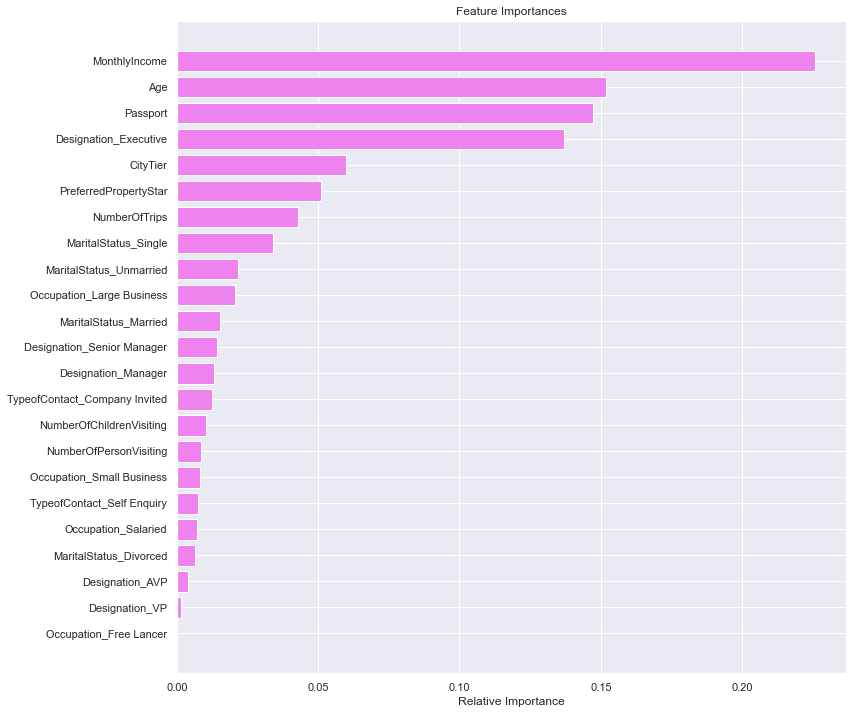

<IPython.core.display.Javascript object>

In [111]:
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The most important features for the tuned Gradient Boost model is MonthlyIncome, followed by Age, then Passport and Designation_Executive. 

#### XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.995031  0.975155    0.99841  0.986646
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.882754  0.547101   0.762626  0.637131


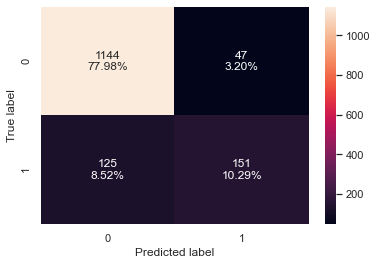

<IPython.core.display.Javascript object>

In [112]:
# Fit the model
xgb = XGBClassifier(random_state=42, eval_metric="logloss")
xgb.fit(x_train, y_train)

# Calculate different metrics
xgb_model_train_perf = model_performance_classification_sklearn(xgb, x_train, y_train)
print("Training performance:\n", xgb_model_train_perf)
xgb_model_test_perf = model_performance_classification_sklearn(xgb, x_test, y_test)
print("Testing performance:\n", xgb_model_test_perf)

# Create confusion matrix
confusion_matrix_sklearn(xgb, x_test, y_test)

In [113]:
xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'eval_metric': 'logloss'}

<IPython.core.display.Javascript object>

* Using the XGBoost model overfits the data as most of the metrics are very close to 1.0 for the training data and much lower for the testing data.  
* From looking at the Confusion Matrix it is apparent that the model does not include all features to incorporate customer characteristics of those individuals who would purchase a vacation package.  True Positives and False Negatives are fairly similar.
* Next review Feature Importance

In [114]:
print(
    pd.DataFrame(
        xgb.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)


                                    Imp
Designation_Executive          0.186558
Passport                       0.120907
MaritalStatus_Single           0.053045
MaritalStatus_Unmarried        0.049894
Occupation_Large Business      0.047837
TypeofContact_Company Invited  0.046830
CityTier                       0.046764
Designation_Manager            0.043360
PreferredPropertyStar          0.040737
MaritalStatus_Married          0.039702
Designation_VP                 0.037207
Age                            0.032636
MaritalStatus_Divorced         0.032580
NumberOfTrips                  0.032018
Designation_Senior Manager     0.031472
Occupation_Small Business      0.030623
Designation_AVP                0.030005
MonthlyIncome                  0.028417
Occupation_Salaried            0.024718
NumberOfPersonVisiting         0.024483
NumberOfChildrenVisiting       0.020208
Occupation_Free Lancer         0.000000
TypeofContact_Self Enquiry     0.000000


<IPython.core.display.Javascript object>

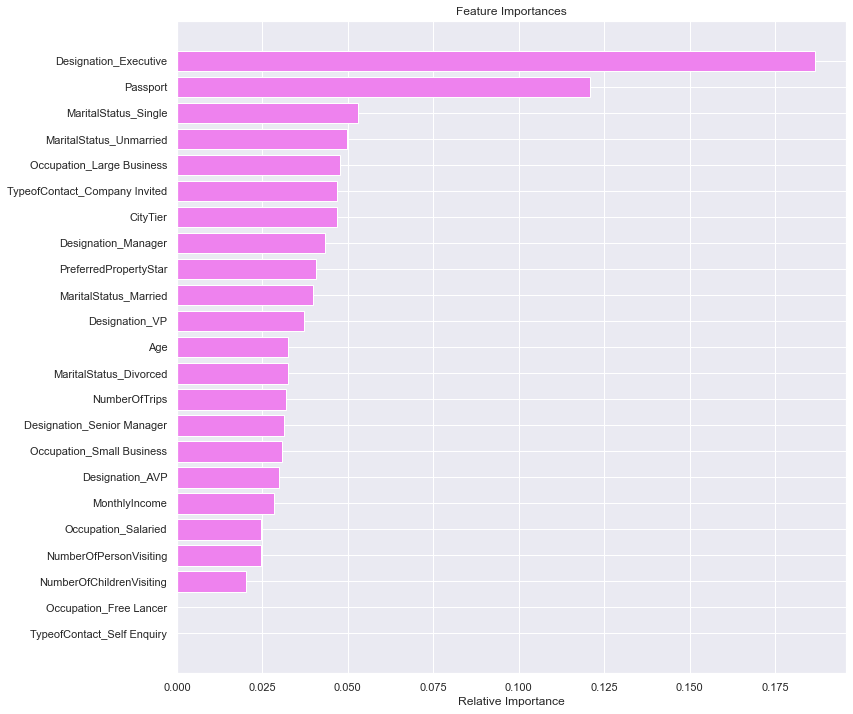

<IPython.core.display.Javascript object>

In [116]:
importances = xgb.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

According to the XGBoost model, the most important feature is Designation_Executive, followed by Passport and MaritalStatus_Single.  This is a departure from all the other models which tend to have Age and Monthly Income the most or closely following the most important feature. 

In [ ]:
# Choose the type of classifier. 
#xgb_tuned = XGBClassifier(random_state=42, eval_metric='logloss')

# Grid of parameters to choose from
#parameters = {
    
#    "max_depth" : [3,4,5,6,7,8,9,10],
#    "n_estimators": [30,50, 80, 100, 125, 150],
#    "scale_pos_weight":[1,2,5],
#    "subsample":[0.5,0.7,0.9,1],
#    "learning_rate":[0.01, 0.02, 0.03, 0.05, 0.1,0.2],
#    "colsample_bytree":[0.5,0.7,0.9,1],
#    "gamma": [3,5,8]
#    
#}

# Type of scoring used to compare parameter combinations-While Precision is the performance metric, F1
# is being used to hyperparameter tune the models because when using Precision, the metric score for
# Precision is very high however the counts of True Positives are extremely low in comparison
# to False Negatives.  Because F1 is a blend of Precision and Recall it will also help maximize
# True Positives as both metrics place emphasis on True Positives.
#scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
#grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
#grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
#xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
#xgb_tuned.fit(x_train, y_train)

In [124]:
estimators = [("Bagging ", bagging), ("Random Forest", rf_tuned), ("XGBoost", xgb)]

final_estimator = bagging_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

stacking_classifier.fit(x_train, y_train)

StackingClassifier(estimators=[('Bagging ', BaggingClassifier(random_state=42)),
                               ('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.81,
                                                                     1: 0.19},
                                                       max_depth=17,
                                                       max_features=None,
                                                       n_estimators=90,
                                                       oob_score=True,
                                                       random_state=42)),
                               ('XGBoost',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1,
                               

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.990354  0.959627     0.9888  0.973995
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.892297  0.612319   0.768182  0.681452


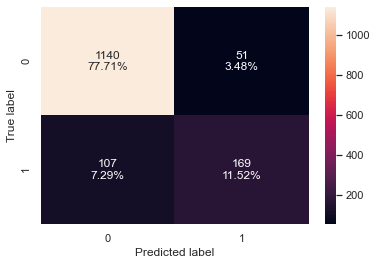

<IPython.core.display.Javascript object>

In [125]:
# Calculate different metrics
stacking_classifier_model_train_perf = model_performance_classification_sklearn(
    stacking_classifier, x_train, y_train
)
print("Training performance:\n", stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier, x_test, y_test
)
print("Testing performance:\n", stacking_classifier_model_test_perf)

# Create confusion matrix
confusion_matrix_sklearn(stacking_classifier, x_test, y_test)

* The Stacking model is fairly overfit as all the training metrics are very close to 1.0.
* However, the testing metrics are on par with the best results from the other models.
* Reviewing the Confusion Matrix, True Positives are higher than False Negatives, which is desirable.  False Positives are fairly low as well.

### Comparing All Models

In [129]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        rf_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        bagging_model_train_perf.T,
        bagging_tuned_model_train_perf.T,
        adaB_model_train_perf.T,
        adaB_tuned_model_train_perf.T,
        gb_model_train_perf.T,
        gb_tuned_model_train_perf.T,
        xgb_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,Stacking Classifier
Accuracy,1.0,0.845075,1.0,0.998538,0.990938,1.0,0.844782,1.0,0.884244,0.912599,0.995031,0.990354
Recall,1.0,0.181677,1.0,0.992236,0.953416,1.0,0.310559,1.0,0.464286,0.594720,0.975155,0.959627
Precision,1.0,0.975000,1.0,1.000000,0.998374,1.0,0.696864,1.0,0.854286,0.909739,0.998410,0.988800
F1,1.0,0.306283,1.0,0.996103,0.975377,1.0,0.429646,1.0,0.601610,0.719249,0.986646,0.973995


<IPython.core.display.Javascript object>

In [131]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree_model_test_perf.T,
        dtree_estimator_model_test_perf.T,
        rf_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        bagging_model_test_perf.T,
        bagging_tuned_model_test_perf.T,
        adaB_model_test_perf.T,
        adaB_tuned_model_test_perf.T,
        gb_model_test_perf.T,
        gb_tuned_model_test_perf.T,
        xgb_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,Stacking Classifier
Accuracy,0.854806,0.833674,0.880709,0.895706,0.886162,0.893661,0.830948,0.884799,0.849352,0.858896,0.882754,0.892297
Recall,0.619565,0.123188,0.489130,0.619565,0.547101,0.576087,0.282609,0.539855,0.369565,0.413043,0.547101,0.612319
Precision,0.612903,0.944444,0.798817,0.780822,0.782383,0.803030,0.609375,0.780105,0.684564,0.716981,0.762626,0.768182
F1,0.616216,0.217949,0.606742,0.690909,0.643923,0.670886,0.386139,0.638116,0.480000,0.524138,0.637131,0.681452


<IPython.core.display.Javascript object>

While the Decision Tree Estimator has a higher Precision and accuracy score than all the other models, the Recall and subsequently F1 score are very low. This is caused by very low True Positives and False Positives.  The issue is comparitively high False Negatives, which suggests the model can't guarantee to identify True Positives on future data sets.  Even though the original goal was to achieve the highest Precision score, for this model, other parameters prove it is not the best model.  Therefore the Bagging Estimator Tuned is the best model.  This model is followed closely by the Random Forest Tuned model. The Random Forest Tuned model has lower precision but higher recall and F1 than the Bagging Estimator Tuned model, however when comparing the Confusion Matrices the Random Forest model has a higher percentage of False Positives than the Bagging moddel.  

#### Feature Importance for Tuned Bagging Classifier

In [145]:
# Again, there is no Feature Importance implemented for the Bagging classifier, however, because the
# bagging classifier uses Decision Trees as the default base estimator, using the mean of all the
# trees in the bagging estimator provides this information

clf = BaggingClassifier(DecisionTreeClassifier())
clf.fit(x, y)
feature_importances = np.mean(
    [tree.feature_importances_ for tree in clf.estimators_], axis=0
)
print(
    pd.DataFrame(
        feature_importances, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
MonthlyIncome                  0.214238
Age                            0.186492
NumberOfTrips                  0.087488
Designation_Executive          0.079021
Passport                       0.064695
PreferredPropertyStar          0.048486
CityTier                       0.046280
NumberOfChildrenVisiting       0.034941
NumberOfPersonVisiting         0.031904
MaritalStatus_Single           0.029234
MaritalStatus_Married          0.021986
MaritalStatus_Unmarried        0.021116
TypeofContact_Company Invited  0.019813
Occupation_Large Business      0.018992
Occupation_Small Business      0.018802
TypeofContact_Self Enquiry     0.017618
Occupation_Salaried            0.017500
MaritalStatus_Divorced         0.014509
Designation_Senior Manager     0.010863
Designation_Manager            0.008437
Designation_VP                 0.004199
Designation_AVP                0.003384
Occupation_Free Lancer         0.000000


<IPython.core.display.Javascript object>

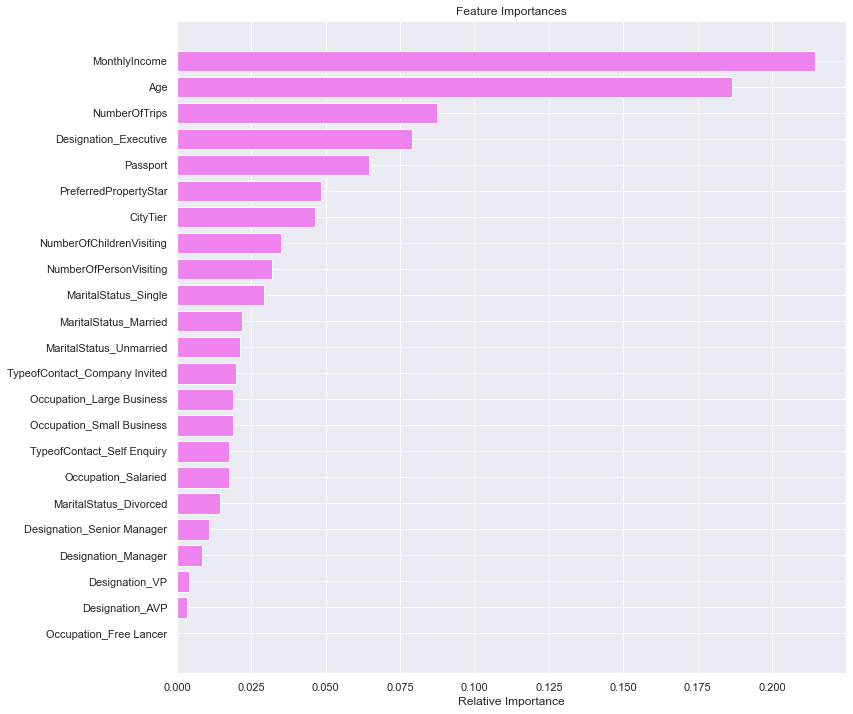

<IPython.core.display.Javascript object>

In [146]:
importances = feature_importances
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Monthly Income is the most important feature for this model, followed by Age, NumberofTrips, Designation_Executive and Passport.


### Conclusion

From the final predictive model it is fairly safe to conclude the type of customers most likely to purchase a travel package have the following characteristics:
1. Median monthly income between 20,000 and 22,500.  This is lower than the median income of the entire data set because there is a slight negative correlation between customers who purchased packages and monthly income.
2. Median age approximately 34 yrs old.  This is also lower than the median age of the entire data set as there is also a slight negative correlation between age and customers who purchased packages.
3. Customers with the professional designation of 'Executive' are more likely to purchase packages than those with other designations.
4. Customers who have passports are more likely to purchase a travel package.
5. Those customers who prefer 5-star properties are more likely to purchase a travel package than lower property ratings. 
6. Customers living in the least populated or developed regions (Tier 3) purchase travel packages more often than more populated areas. 

When developing sales and marketing strategies attention should be focused on the following areas:
1. The average acceptable length of an initial sales pitch should range from 10-23 minutes.
2. The range of successful follow-up calls should be between 3 and 5 calls.